In [1]:
import warnings
warnings.filterwarnings('ignore')

import pdb

#### Loading the dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/ashis/Downloads/Project-Housing--2-/Project-Housing_splitted/train.csv',index_col = False)

#### Descriptive Analysis

In [4]:
import numpy as np

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [7]:
df.shape

(1168, 81)

Our dataset has $1168$ housing records data which is divided into $80$ **independent features** which describe various aspects of a house and **one target feature** which is **sale price of the house**.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Independent features are a mix of datatypes. $3$ features are **float64*, $35$ features are **int64** and $43$ features are **object** datatype.

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From statistical summary for numerical features, we observe below details:
**Id** - This is just an identification number allocated to the housing records to differentiate them.

**MsSubClass** - This is also a numerification of categorical varibale.

**LotFrontage** - The **mean of linear street connected to the properties** is given as **71 feet**, but the **high std** value means the distribution is not normal and much of the data is spread away from the mean value. The **maximum lot frontage** for any house is given to us as **313 feet** and the **minimum lot frontage** is **21 feet**.

**LotArea** - The **mean lot size** of houses in the housing records available to us is **10485 sq.feet**. The **very high std** value means the distribution is not bell shaped normal curve, but instead the data distribution is away from the mean. The **maximum lot area** available to us is given as **1,64,660 sq.feet** and the **minimum lot area** is **1,300 sq.feet**.

**OverallQual** - This is just a numerical encoding of categorical variable type.

**OverallCond** - This is just a numerical encoding of categorical variable type.

**YearBuilt** - As per the housing records available to us, the **latest house record available to us is builded in 2010**, while **the oldest** house is of year **1875**.

**YearRemodAdd** - As per the housing records, the **oldest remodeled house** is remodelled in **1950**, while **the newest remodeled house** are belonging to year **2010**.

**MasVnrArea** - This is just a numerical encoding of categorical variable type.

**BsmtFinSF1** - The **mean of area of Type 1 finished basements** of all available dataset housing records is **445 sq.feet**, the data distribution for this feature is not normal as can be seen from **high std** value. The **minimum basement area for Type 1** is **0 sq.feet** while the **maximum basement area for Type 1** is **5644 sq.feet**.

**BsmtFinSF2** - The **mean of area of Type 2 finished basements**of all available dataset housing records is **47 sq.feet**, the data distribution for this feature is not normal as can be seen from **high std** value. The **minimum basement area for Type 2** is **0 sq.feet** while the **maximum basement area for Type 2** is **1474 sq.feet**.

**BsmtUnfSF** - The **mean of unfinished basement areas** of all available dataset housing records is **569 sq.feet** while the **standard deviation** of the data distribution is **high** means much of the data is spread away from the mean. The **maximum area of unfinished basement** which is available in dataset is **2336 sq.feet** and the **minimum is 0**.

**TotalBsmtSF** - The **mean of total basement areas** of houses in our dataset is **1061 sq.feet**. The **high standard deviation** value for this feature means **the distribution of data is away from the mean value**. The **maximum total basement area** value is **6110 sq.feet** and the **minimum is 0**.

**1stFlrSF** - The **mean of 1st floor surface areas** of houses in our dataset is **1170 sq.feet**. The **standard deviaion is very high** showing distribution of data away from the mean value. The **maximum 1st floor surface area** available to us is **4692 sq.feet** and the **minimum is 334 sq.feet**.

**2ndFlrSF** - The **mean of 2nd floor surface areas** of houses in our dataset is **349 sq.feet**. The **standard deviaion is very high** showing distribution of data away from the mean value. The **maximum 2nd floor surface area** available to us is **2065 sq.feet** and the **minimum is 0 sq.feet**.

**LowQualFinSF** - The **mean of low quality surface areas(for all floors)** of housing records available to us is **6 sq.feet**. The **standard deviation** value is very high and also the **maximum low quality surface area** is **572 sq.feet**.

**GrLivArea** - The **mean value of above-ground living areas of all houses** in our dataset is **1525 sq.feet**. The standard deviation is very high meaning the data is spread away from the mean. The **maximum value** of above ground living area is **5642 sq.feet** and the **minimum area is 334 sq.feet**.

**BsmtFullBath** - As per the housing records available to us, we have **maximum 3 full bathrooms** available in the basement. **75%** of available houses records have **1 full bathroom in the basement**.

**BsmtHalfBath** - As per the housing records available to us, we have **maximum 2 half-bathrooms available in the basement**.

**FullBath** - **Maximum number of full bathrooms** for houses above ground level is **3 full-baths** while most of the above-ground houses have 2 full bathrooms.

**HalfBath** - Maximum number of half bathrooms for houses above ground level is 2 half-baths as per our records.

**BedroomAbvGr** - The **mean of number of bedrooms** for above-ground houses is given as **3 bedrooms** while the maximum number of bedrooms available for above-ground houses is given as 8 bedrooms.

**KitchenAbvGr** - Most of the above-ground houses have 1 kitchen only but the **maximum number of kitchens for a house** is given to us as **8 kitchens**.

**TotRmsAbvGrd** - As per the housing records available to us, we see that **most of the above-ground houses have 6 rooms** while the minimum number of rooms is 2 rooms and **maximum** number of rooms is **14 rooms** for above-ground houses.

**Fireplaces** - Some of the houses in our housing records have **maximum 3 fireplaces but they are not so common**.

**GarageYrBlt** - The **oldest record of garage built** is in year **1900**. 

**GarageCars** - Houses under our consideration have **minimum 1 car space and maximum 4 car spaces** in their garages.

**GarageArea** - The **mean area of garages** in our housing records is **476 sq.feet**. The **maximum** garage area is given as **1418 sq.feet**.

**WoodDeckSF** - The **mean surface area of Wood Decks in houses** in our housing records is **96 sq.feet**. The wood deck with **maximum surface area is available with area 857 sq.feet**.

**OpenPorchSF** - The **mean of open porch surface areas** of houses in our housing records is **46 sq.feet** while the **maximum open porch surface area** available to us is **547 sq.feet**

**EnclosedPorch** - The **mean surface area of enclosed porches** in our housing records is **23 sq.feet** while the **maximum enclosed porch** is of surface area **552 sq.feet**

**3SsnPorch** - The **mean surface area of three season porches** of houses in housing records is **3.6 sq.feet** while the maximum three season porch surface area available in our records is 508 sq.feet.

**PoolArea** - The **mean of all available pool areas** from our housing records is **3 sq.feet** while the maximum pool area available in the records is 738 sq.feet

**MiscVal** - The **mean amount spend on miscellaneous features** of the houses in our housing records is around **$47** while tha maximum amount spent on miscellaneous features is $15,500.

**SalePrice** - The **mean selling price** of the houses is **USD 181,477** as per our housing records. The minimum selling price is $34900 while the maximum selling price has been $755000.

In [10]:
df_dup = df[df.duplicated()]
df_dup.shape

(0, 81)

We do not find any duplicated records in our available housing dataset.

### EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sn

##### Target feature: 'SalePrice'

This is our target feature in the dataset. The sale price of the house.

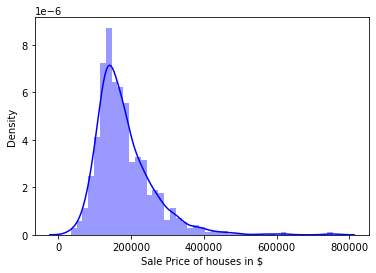

In [12]:
sn.distplot(df['SalePrice'],color = 'blue')
plt.xlabel('Sale Price of houses in $')
plt.show()

We have most sales happened between $100,000-$200,000. We also have few houses sold record at extreme prices like $700,000. The distribution for our target feature is right skewed because of the few house sale records with very high prices than most of the other house prices.

In [13]:
def iqr(feature_name):
    """this function return iqr value for the feature"""
    q1 = df[feature_name].quantile(0.25)
    q3 = df[feature_name].quantile(0.75)
    
    return q3-q1

In [14]:
3*iqr('SalePrice')

253875.0

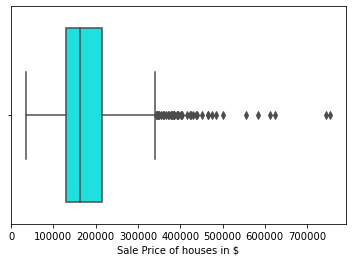

In [15]:
sn.boxplot(df['SalePrice'],color = 'cyan')
plt.xlabel('Sale Price of houses in $')
plt.show()

In [16]:
list_cols = df.columns

In [17]:
list_cols[0]

'Id'

##### 1.'Id'

This is just an identification number allocated to each house in housing records so we will not explore it's characteristics.

In [18]:
list_cols[1]

'MSSubClass'

##### 2.'MSSubClass'

Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

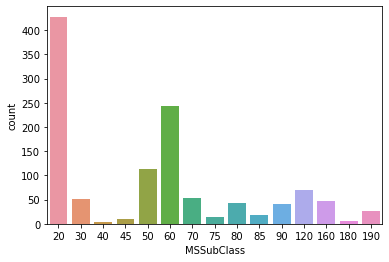

In [19]:
sn.countplot(df['MSSubClass'])
plt.show()

From above plot of 'MSSubClass' , we observe that most of the houses sold are '1-STORY 1946 & NEWER ALL STYLES'(20), followed by '2-STORY 1946 & NEWER'(60) built houses.

In 1 storey-houses, as expected unfinished house sells are very very less while for the 2-storey houses the sell is more for houses built after 1946 & Newer as compared to before 1945 houses.

Duplexes(all styles and ages) and 1-1/2 and 2 storey Planned Unit Development house sells are almost equal.(90-120-160)

#### MSSubClass vs SalePrice

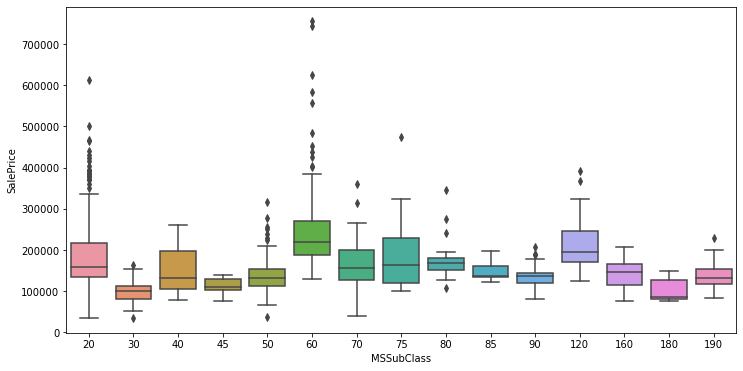

In [20]:
plt.figure(figsize=(12,6))
sn.boxplot(x=df['MSSubClass'],y=df['SalePrice'])
plt.show()

From above plot , we see that in our housing dataset, very high price sales are recorded for 1-story as well as 2-story buildings built after 1946 & Newer represented with '20' and '60' Subclass . After it high sales prices are recorded for 2-1/2 story buildings and 1-story Planned Unit Developments built after 1946 & Newer. For all other type of dwellings, the sale price is in the range of less than $300,000.

In [21]:
list_cols[2]

'MSZoning'

##### 3.'MSZoning'

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

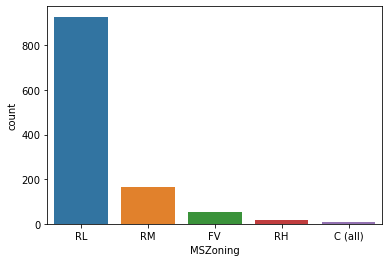

In [22]:
sn.countplot(df['MSZoning'])
plt.show()

From above plot of 'MSZoning', we observe that most of the house sell has happened in residential area with low density without park. After that residential area with medium density sell is more. We have very few records available for residential area with high density and no records for residential area with loaw density with park.

#### MSZoning vs SalePrice

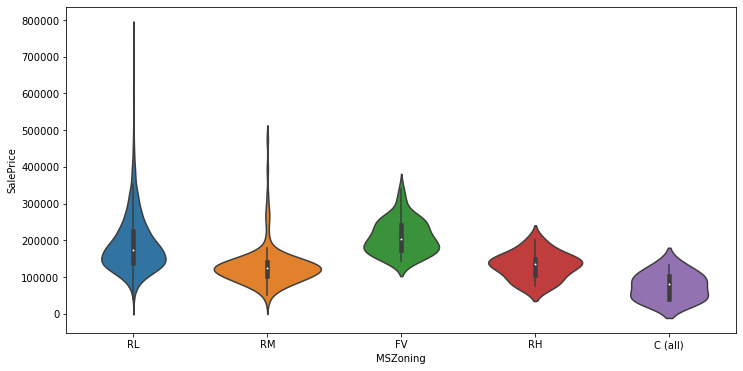

In [23]:
plt.figure(figsize=(12,6))
sn.violinplot(x=df['MSZoning'],y=df['SalePrice'])
plt.show()

From above plot, we see that in our housing dataset high sale prices are fetched in the residential area with low density and medium density and these two zones have very varying sales prices for houses. In our records, the Floating Village Residential zone house price sales are not varying much and are concentrated around USD 300,000.From our records, we also observe that houses in the residential zones with high density and commercial zone houses are priced for less than USD200,000.

In [24]:
list_cols[3]

'LotFrontage'

##### 4.'LotFrontage'

Linear length of street connected to property in sq.feet

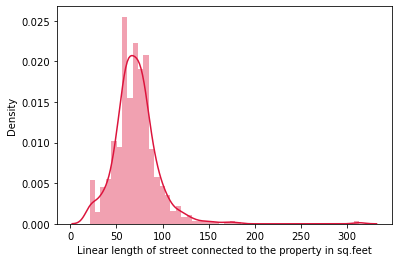

In [25]:
sn.distplot(df['LotFrontage'],color='crimson')
plt.xlabel('Linear length of street connected to the property in sq.feet')
plt.show()

From above plot for 'LotFrontage' , we see that most of the houses we have for analysis have 20-100 feet of street connected to the property, very few houses under our observation have more than 250 feet of street connected to the property. Because of the few house records with more than 200 sq.feet of lot frontage the distribution in this feature is right skewed.

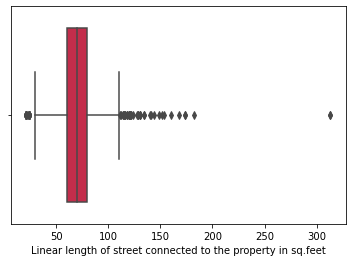

In [26]:
sn.boxplot(df['LotFrontage'],color='crimson')
plt.xlabel('Linear length of street connected to the property in sq.feet')
plt.show()

As some houses may have long distance between street and the property, so we will not remove the outlying values in above boxplot, instead we will try to normalize the data and then try to standardize it.

In [27]:
df['LotFrontage'].min()

21.0

As min value is not zero, we will apply log transform to reduce the skewness  present in the distribution.

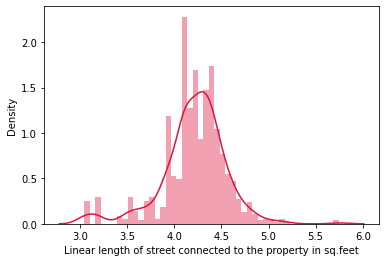

In [28]:
sn.distplot(np.log(df['LotFrontage']),color='crimson')
plt.xlabel('Linear length of street connected to the property in sq.feet')
plt.show()

We observe that the skewness has been removed and we can standardize the data using standard scaler.

#### LotFrontage vs SalePrice

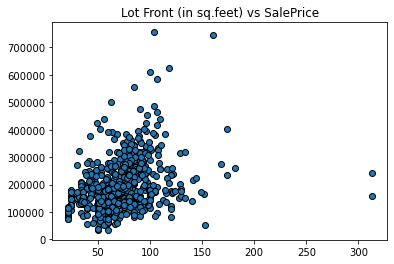

In [29]:
plt.scatter(x=df['LotFrontage'],y=df['SalePrice'],edgecolors='black')
plt.title("Lot Front (in sq.feet) vs SalePrice")
plt.show()

From our housing dataset, we observe that there is a linear relationship between 50-100 sq.feet of Lot Front area houses and Sale Price. But as the front lot area increases beyond 100 sq.feet, the house sale prices are increasing upto 170-180 sq.feet later house prices are becoming saturated around USD 200,000 - USD 300,000. This means as the distance from the street increases much further than necessary , the house prices are going down.

In [30]:
list_cols[4]

'LotArea'

##### 5.'LotArea'

Lot size in square feet

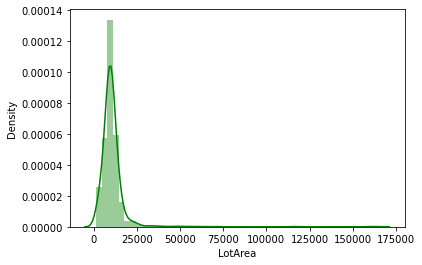

In [31]:
sn.distplot(df['LotArea'],color='green')
plt.show()

From above plot for 'LotArea', we observe that most of the sale of houses have happened for the houses with lot area less than 25000 sq.feet. Very few sale record for houses with lot area more than 25000.

The data distribution for 'LotArea' feature is right skewed but it may be because the presence of sale record for houses with lot areas much greater than the lot areas for most of the sold houses.

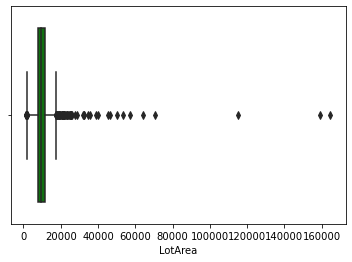

In [32]:
sn.boxplot(df['LotArea'],color='green')
plt.show()

As we have few house sale records for houses with lot area more than 20000-40000 sq.feet, these few records are being displayed as outliers, so instead of removing them we will normalize the feature and try to standardize it.

In [33]:
df['LotArea'].min()

1300

As min value for LotArea is not zero, we will try log transform to remove the skewness in the distribution.

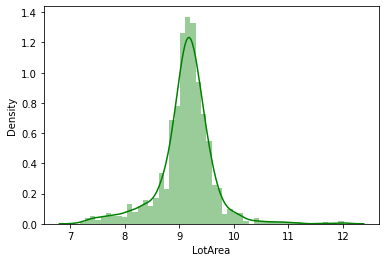

In [34]:
sn.distplot(np.log(df['LotArea']),color='green')
plt.show()

We observe that the skewness is removed after applying the log transform on LotArea feature.

#### LotArea Vs SalePrice

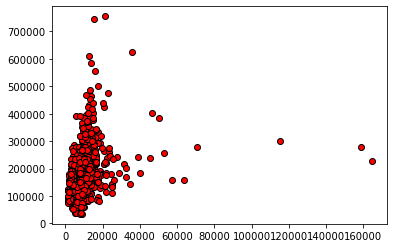

In [35]:
plt.scatter(x=df['LotArea'],y=df['SalePrice'],edgecolors='black',color='red')
plt.show()

As per our housing records, we see very sharp increase in sale price for small increase in lot area. We have very few records available forhouses with lot area more than 60000 sq.feet

In [36]:
list_cols[5]

'Street'

##### 6.'Street'

Type of road access to property

       Grvl -->	Gravel	
       Pave	--> Paved

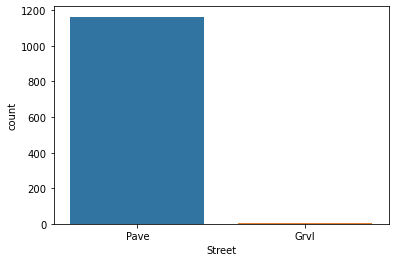

In [37]:
sn.countplot(df['Street'])
plt.show()

From above plot for 'Street' , we observe that most of the sales records we have are for houses with access by paved road.

In [38]:
df['Street'][df['Street']=='Grvl']

759     Grvl
1094    Grvl
1123    Grvl
1139    Grvl
Name: Street, dtype: object

#### Street vs SalePrice

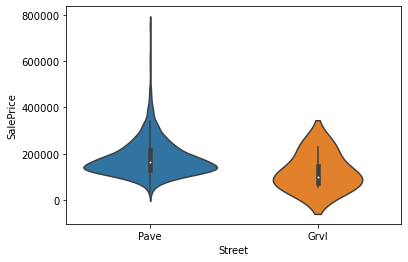

In [39]:
sn.violinplot(x=df['Street'],y=df['SalePrice'])
plt.show()

We see that the high sales prices are recorded for houses with Paved street and the sales prices are varying much for Paved roads. On the other hand, houses with gravel road are not costly and range around USD200,000.

In [40]:
list_cols[6]

'Alley'

##### 7.'Alley'

Type of alley access to property

       Grvl	--> Gravel
       Pave	--> Paved
       NA 	--> No alley access

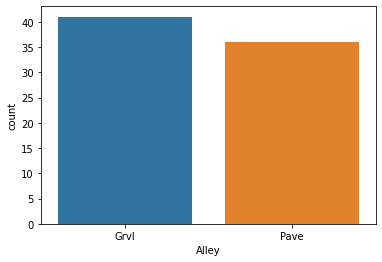

In [41]:
sn.countplot(df['Alley'])
plt.show()

From above plot for 'Alley' , we observe that our dataset has few house records with only 'Gravel' and 'Paved' type alley access to the property, most of the houses in our dataset have no access to the alley.

In [42]:
len(df['Alley'][df['Alley']=='Grvl'])/len(df['Alley'])*100

3.51027397260274

In [43]:
len(df['Alley'][df['Alley']=='Pave'])/len(df['Alley'])*100

3.0821917808219177

#### Alley vs SalePrice

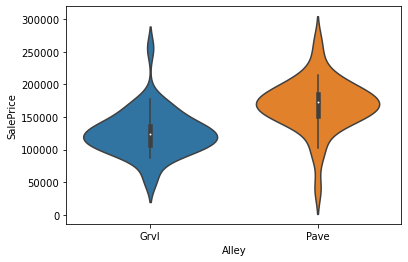

In [44]:
sn.violinplot(x=df['Alley'],y=df['SalePrice'])
plt.show()

We have few records for houses with alley access and in those records , we observe that there is no as such significant difference between the sale prices for houses with either Gravel alley access or Pave alley.

In [45]:
list_cols[7]

'LotShape'

##### 8.'LotShape'

General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

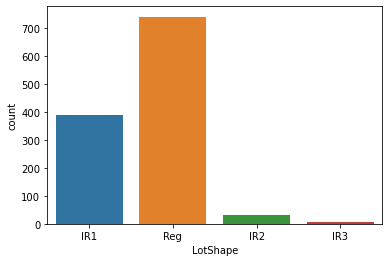

In [46]:
sn.countplot(df['LotShape'])
plt.show()

From above plot for 'LotShape' feature, we observe that our dataset mostly has sales records for houses with Regular shaped properties followed by slightly irregular properties. Very few properties have moderately and completely irregular shapes as per our dataset.

In [47]:
len(df['LotShape'][df['LotShape']=='IR2'])/len(df['LotShape'])*100

2.73972602739726

In [48]:
len(df['LotShape'][df['LotShape']=='IR3'])/len(df['LotShape'])*100

0.5136986301369862

In [49]:
len(df['LotShape'][df['LotShape']=='IR1'])/len(df['LotShape'])*100

33.39041095890411

In [50]:
len(df['LotShape'][df['LotShape']=='Reg'])/len(df['LotShape'])*100

63.35616438356164

#### LotShape vs SalePrice

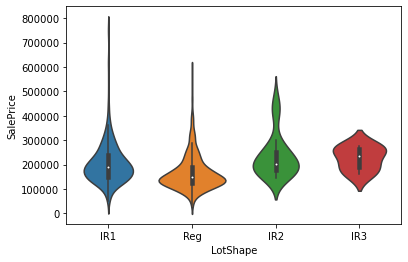

In [51]:
sn.violinplot(x=df['LotShape'],y=df['SalePrice'])
plt.show()

In our housing dataset, we do not see any specific relation between the irregularity of lot and the variation of sale prices.

In [52]:
list_cols[8]

'LandContour'

##### 9.'LandContour'

Flatness of the property

       Lvl -->	Near Flat/Level	
       Bnk -->	Banked - Quick and significant rise from street grade to building
       HLS -->	Hillside - Significant slope from side to side
       Low -->	Depression

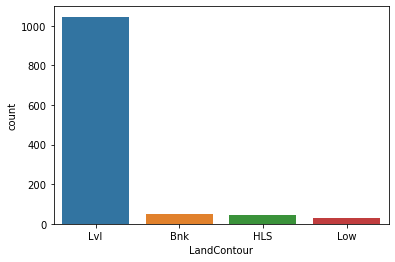

In [53]:
sn.countplot(df['LandContour'])
plt.show()

From above plot for 'LandContour', we observe that most of the houses in our sales record are built on near flat/level. Very few houses in our record are on banked or hillside or depressed landscape.

In [54]:
len(df['LandContour'][df['LandContour']=='Lvl'])/len(df['LandContour'])*100

89.55479452054794

In [55]:
len(df['LandContour'][df['LandContour']=='Bnk'])/len(df['LandContour'])*100

4.280821917808219

In [56]:
len(df['LandContour'][df['LandContour']=='HLS'])/len(df['LandContour'])*100

3.595890410958904

In [57]:
len(df['LandContour'][df['LandContour']=='Low'])/len(df['LandContour'])*100

2.5684931506849313

#### LandContour vs SalePrice

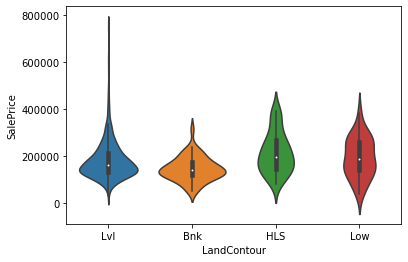

In [58]:
sn.violinplot(x=df['LandContour'],y=df['SalePrice'])
plt.show()

We see that from our housing dataset, the prices for houses built on hillside (with significant slope) and built on depression slope have slightly 

In [59]:
list_cols[9]

'Utilities'

##### 10.'Utilities'

Type of utilities available
		
       AllPub -->	All public Utilities (E,G,W,& S)	
       NoSewr -->	Electricity, Gas, and Water (Septic Tank)
       NoSeWa -->	Electricity and Gas Only
       ELO    -->	Electricity only

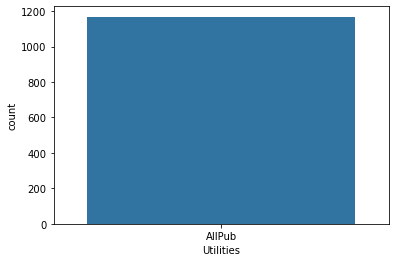

In [60]:
sn.countplot(df['Utilities'])
plt.show()

In [61]:
df['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

#### Utilities vs SalePrice

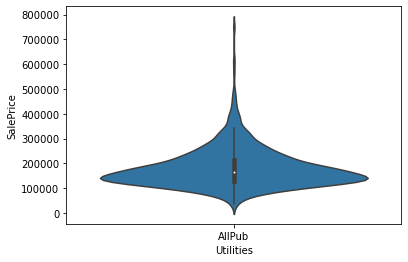

In [62]:
sn.violinplot(x=df['Utilities'],y=df['SalePrice'])
plt.show()

As our dataset contains house records, we are seeing presence of all public utilities requirements like Electricity, Gas, Water, Sewage under 'Utilities' feature.

In [63]:
list_cols[10]

'LotConfig'

##### 11.'LotConfig'

Lot configuration

       Inside  -->	Inside lot
       Corner  -->	Corner lot
       CulDSac -->	Cul-de-sac
       FR2     -->	Frontage on 2 sides of property
       FR3     -->	Frontage on 3 sides of property

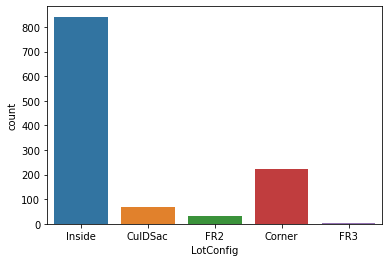

In [64]:
sn.countplot(df['LotConfig'])
plt.show()

From above plot we see that, most of the houses sales data that we have are inside lot properties, followed by houses around corner lots. Very few house lots have frontage on 2 or 3 sides of the property.

In [65]:
len(df['LotConfig'][df['LotConfig']=='Inside'])/len(df['LotConfig'])*100

72.08904109589042

In [66]:
len(df['LotConfig'][df['LotConfig']=='Corner'])/len(df['LotConfig'])*100

19.006849315068493

In [67]:
len(df['LotConfig'][df['LotConfig']=='CulDSac'])/len(df['LotConfig'])*100

5.907534246575342

In [68]:
len(df['LotConfig'][df['LotConfig']=='FR2'])/len(df['LotConfig'])*100

2.8253424657534243

#### LotConfig vs SalePrice

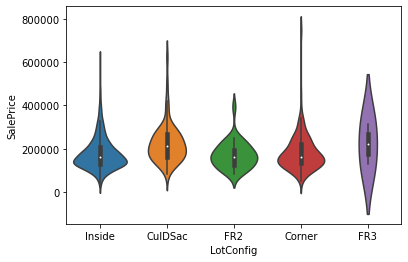

In [69]:
sn.violinplot(x=df['LotConfig'],y=df['SalePrice'])
plt.show()

In [70]:
list_cols[11]

'LandSlope'

##### 12.'LandSlope'

Slope of property
		
       Gtl -->	Gentle slope
       Mod -->	Moderate Slope	
       Sev -->	Severe Slope

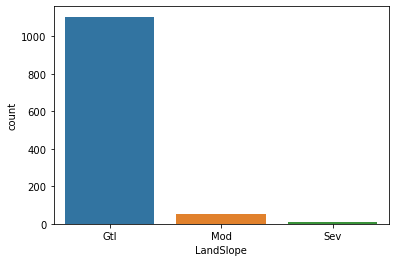

In [71]:
sn.countplot(df['LandSlope'])
plt.show()

From above plot , we see that very few houses in our house sales record are built on moderate or severe slope. Most of the sold houses are built on Gentle slope.

#### LandSlope vs SalePrice

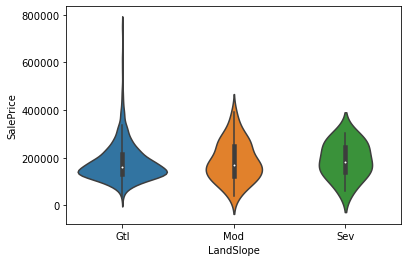

In [72]:
sn.violinplot(x=df['LandSlope'],y=df['SalePrice'])
plt.show()

In [73]:
list_cols[12]

'Neighborhood'

##### 13.'Neighborhood'

Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

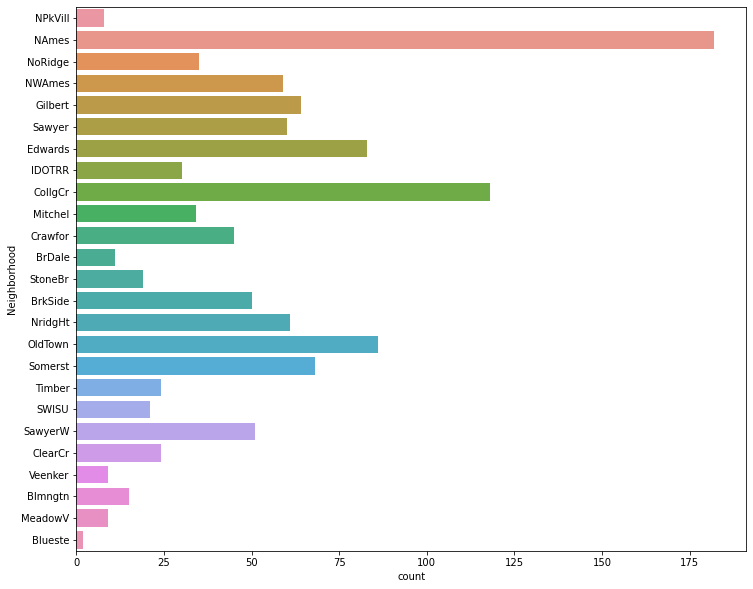

In [74]:
plt.figure(figsize=(12,10))
sn.countplot(y=df['Neighborhood'])
plt.show()

From above plot, we observe that in our housing sales record, most of the sale has recorded around 'North Ames' neighborhood, followed by College Creek , Old Town and Edwards neighborhoods. Very few house sales record is available for Bluestem, Meadow Village, Bloomington Heights, veenker neighborhoods.

#### Neighborhood vs SalePrice

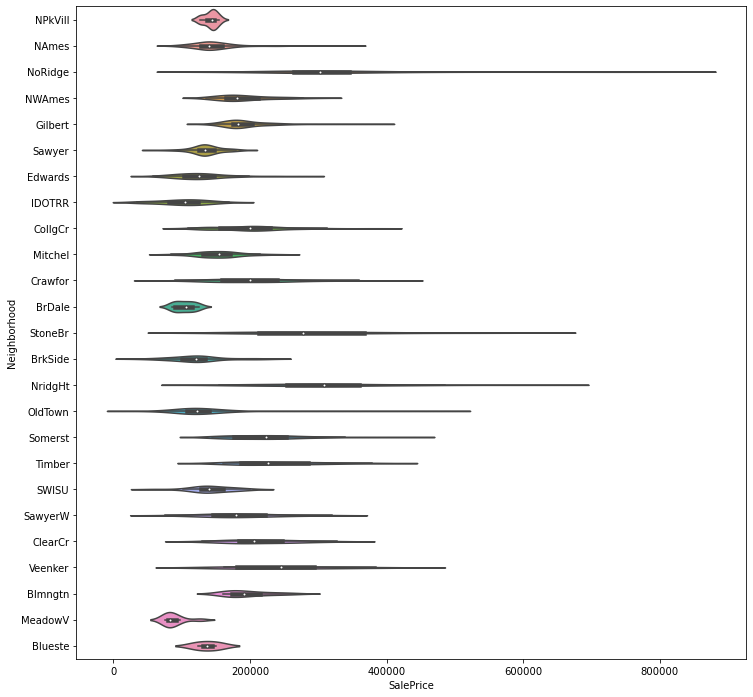

In [75]:
plt.figure(figsize=(12,12))
sn.violinplot(y=df['Neighborhood'],x=df['SalePrice'])
plt.show()

In [76]:
list_cols[13]

'Condition1'

##### 14.'Condition1'

Proximity to various conditions
	
       Artery -->	Adjacent to arterial street
       Feedr -->	Adjacent to feeder street	
       Norm  -->	Normal	
       RRNn -->	Within 200' of North-South Railroad
       RRAn -->	Adjacent to North-South Railroad
       PosN -->	Near positive off-site feature--park, greenbelt, etc.
       PosA -->	Adjacent to postive off-site feature
       RRNe -->	Within 200' of East-West Railroad
       RRAe -->	Adjacent to East-West Railroad

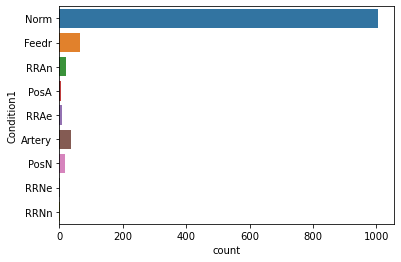

In [77]:
sn.countplot(y=df['Condition1'])
plt.show()

From above plot, we observe that our housing sales record dataset has more than 90% of houses sold with 'Normal' proximity to various conditions. After it, less sales data for houses adjacent to feeder street and adjacent to arterial street have been provided to us. Very very less data is available for houses adjacent to Railroads.

#### Condition1 vs SalePrice

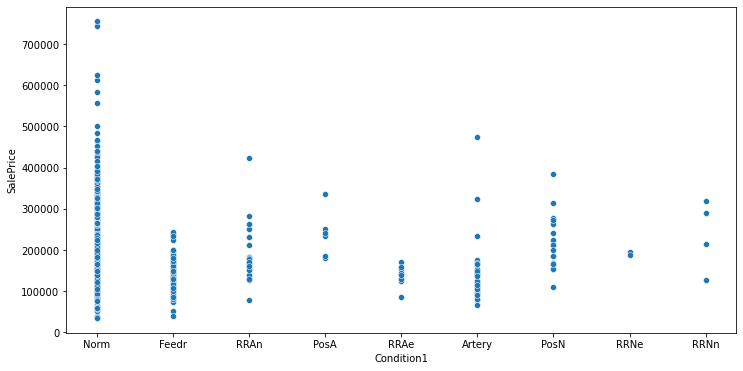

In [78]:
plt.figure(figsize=(12,6))
sn.scatterplot(x=df['Condition1'],y=df['SalePrice'])
plt.show()

As expected, we find that houses within normal proximity to all travel points and other amneties had high sale prices, while after it we see that in our records, houses adjacent to North-South Railroad and adjacent to arterial street had more than average prices. 

In [79]:
list_cols[14]

'Condition2'

##### 15.'Condition2'

Proximity to various conditions (if more than one is present)
		
       Artery -->	Adjacent to arterial street
       Feedr -->	Adjacent to feeder street	
       Norm -->	Normal	
       RRNn -->	Within 200' of North-South Railroad
       RRAn -->	Adjacent to North-South Railroad
       PosN -->	Near positive off-site feature--park, greenbelt, etc.
       PosA -->	Adjacent to postive off-site feature
       RRNe -->	Within 200' of East-West Railroad
       RRAe -->	Adjacent to East-West Railroad

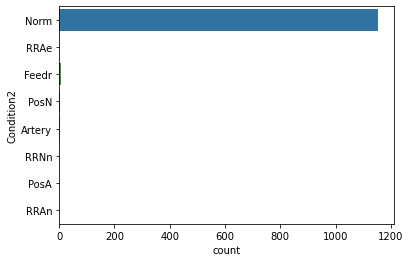

In [80]:
sn.countplot(y=df['Condition2'])
plt.show()

We observe that in our housing dataset, for houses having proximity to more than one given specified conditions, the other next condition is 'Normal' proximity to everything.

#### Condition2 vs SalePrice

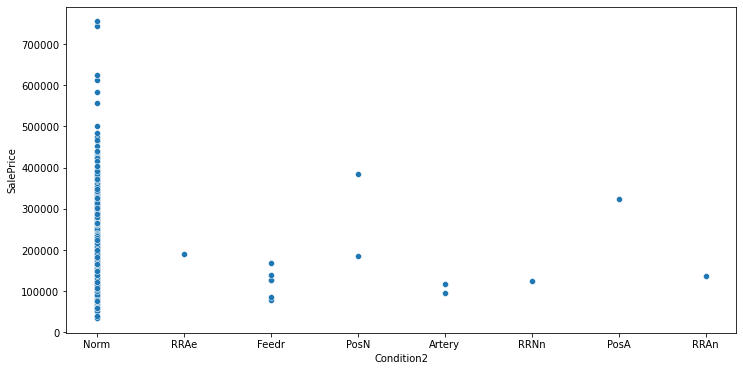

In [81]:
plt.figure(figsize=(12,6))
sn.scatterplot(x=df['Condition2'],y=df['SalePrice'])
plt.show()

In [82]:
list_cols[15]

'BldgType'

##### 16.'BldgType'

Type of dwelling
		
       1Fam   -->	Single-family Detached	
       2FmCon -->	Two-family Conversion; originally built as one-family dwelling
       Duplx  -->	Duplex
       TwnhsE -->	Townhouse End Unit
       TwnhsI -->	Townhouse Inside Unit

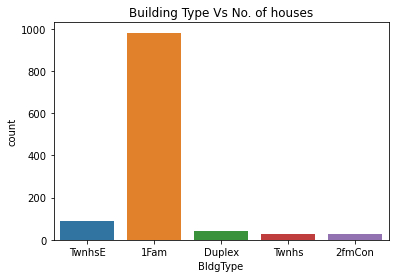

In [83]:
sn.countplot(df['BldgType'])
plt.title('Building Type Vs No. of houses')
plt.show()

As per our housing records, most of the sold houses are 'single family detached' building types. Rest all building types are not having sufficient records.

#### BldgType vs SalePrice

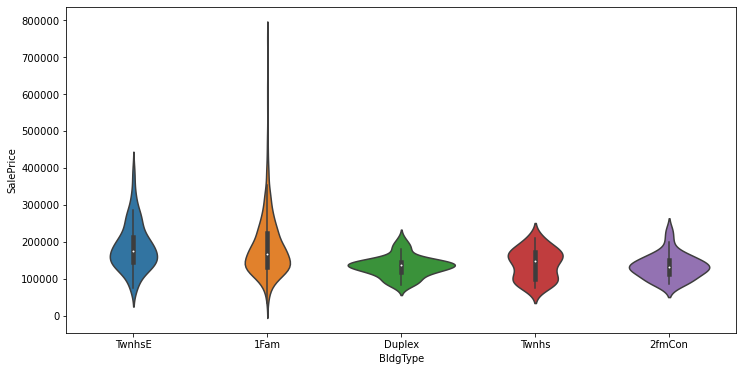

In [84]:
plt.figure(figsize=(12,6))
sn.violinplot(x=df['BldgType'],y=df['SalePrice'])
plt.show()

We see high prices in our house sale records for 'single family detached' houses, but like all other dwelling types the prices are mostly saturated between USD 100,000 - USD 300,000.

In [85]:
list_cols[16]

'HouseStyle'

##### 17.'HouseStyle'

Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	    Split Level

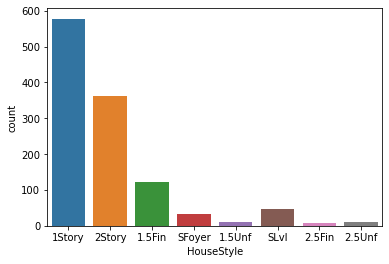

In [86]:
sn.countplot(df['HouseStyle'])
plt.show()

From above plot, we observe that in our house sale records dataset more than half records are of 1story houses, followed by 2story houses records. We also more than 100 records for 'One and one-half story: 2nd level finished' houses. We have less than 50 house sale records for 'all types of Split and two story' type houses.

In [87]:
len(df['HouseStyle'][df['HouseStyle']=='1Story'])/len(df['HouseStyle'])*100

49.486301369863014

In [88]:
len(df['HouseStyle'][df['HouseStyle']=='2Story'])/len(df['HouseStyle'])*100

30.90753424657534

In [89]:
len(df['HouseStyle'][df['HouseStyle']=='1.5Fin'])/len(df['HouseStyle'])*100

10.35958904109589

In [90]:
len(df['HouseStyle'][df['HouseStyle']=='SLvl'])/len(df['HouseStyle'])*100

4.023972602739726

#### HouseStyle vs SalePrice

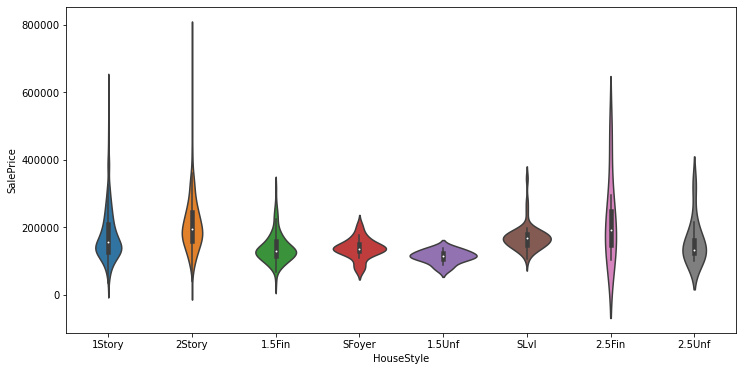

In [91]:
plt.figure(figsize=(12,6))
sn.violinplot(x=df['HouseStyle'],y=df['SalePrice'])
plt.show()

As expected, in our housing dataset, high house sale prices are recorded for 1story and 2story buildings. 2story buildings has a lot of price variations. After them, 1.5 story and 2.5 story construction finished buildings have high prices with 2.5 story buildings having much price variations.

In [92]:
list_cols[17]

'OverallQual'

##### 18.'OverallQual'

Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

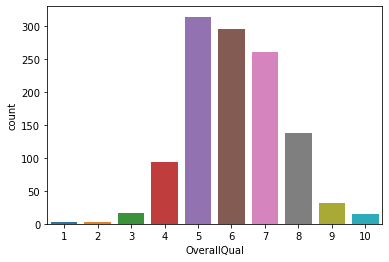

In [93]:
sn.countplot(df['OverallQual'])
plt.show()

Our housing dataset has sufficient records for houses with quality between 'Good and Average'. We also have some records for 'Very Good' quality houses as well as some 'Below Average' quality houses. We have less than 50 house sales records available for 'poor, very poor as well as very excellent' type houses.

#### OverallQual vs SalePrice

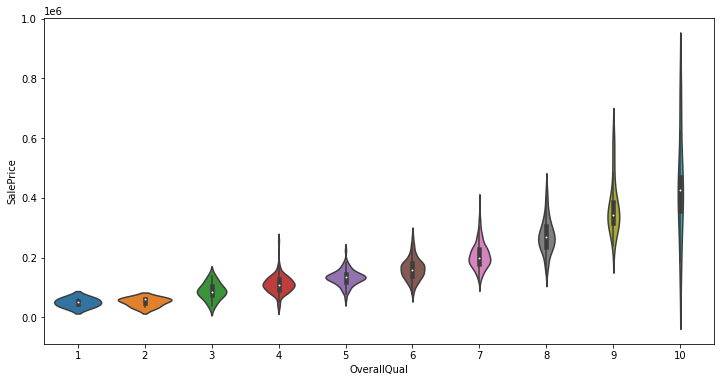

In [94]:
plt.figure(figsize=(12,6))
sn.violinplot(x=df['OverallQual'],y=df['SalePrice'])
plt.show()

As the quality of material in building the houses and the finishing quality increases, the price of the house is also increased.

In [95]:
list_cols[18]

'OverallCond'

##### 19.'OverallCond'

Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

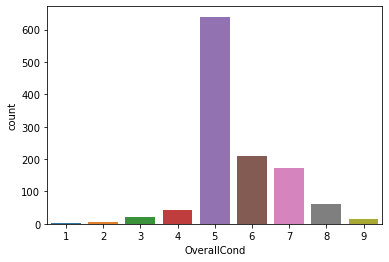

In [96]:
sn.countplot(df['OverallCond'])
plt.show()

Our housing sales records have more than 600 houses with 'Average' overall condition. We also have around 200 house sale records for houses in 'Above average' and 'Good' condition. We have 30-40 house sales record for houses in 'very good' and 'below average' condition and very very few sales records for houses in 'Very poor' and 'very excellent' condition.

#### OverallCond vs SalePrice

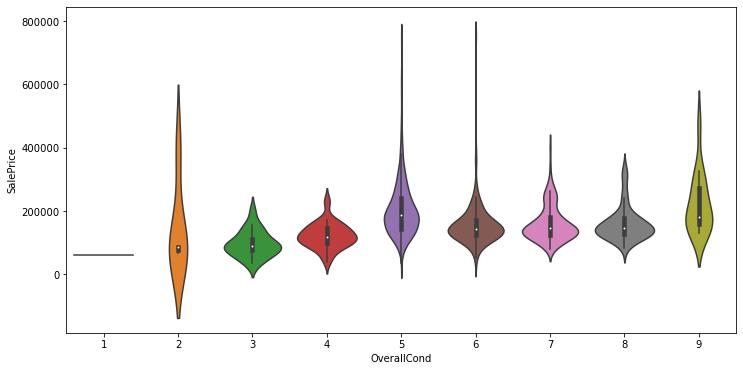

In [97]:
plt.figure(figsize=(12,6))
sn.violinplot(x=df['OverallCond'],y=df['SalePrice'])
plt.show()

As per our housing records, we observe that we have high house sale prices for houses with overall above average & average conditions. We see some irregularity in the data as we see we have high prices recorded for the houses in poor conditions also. So we will ignore this feature. Other than it, the house sale prices are mostly in the range USD 200,000. 

In [98]:
list_cols[19]

'YearBuilt'

##### 20.'YearBuilt'

Original construction year.

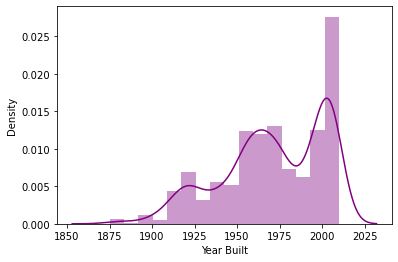

In [99]:
sn.distplot(df['YearBuilt'],color = 'purple')
plt.xlabel('Year Built')
plt.show()

We have house sales records available for houses built from before 1880 till 2010. So we have long range for house sale records but the old house records for houses built before 1947 are less than 100 while we have between 200-350 house records for houses built each year after 1960.

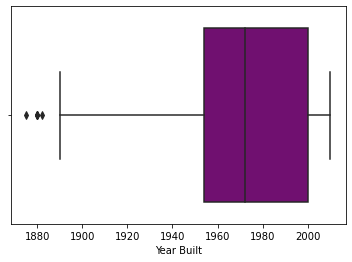

In [100]:
sn.boxplot(df['YearBuilt'],color = 'purple')
plt.xlabel('Year Built')
plt.show()

We have very few house sale records for years before 1900 which are displayed as outliers, but we will not process them.

In [101]:
df['YearBuilt'].min()

1875

As the minimum value for this feature is not zero, we will apply log transform to reduce the skewness present in the distplot and to restrict the outliers to close values.

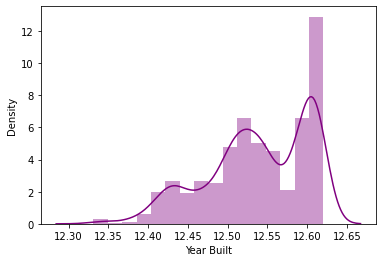

In [102]:
sn.distplot(np.cbrt(df['YearBuilt']),color = 'purple')
plt.xlabel('Year Built')
plt.show()

#### YearBuilt vs SalePrice

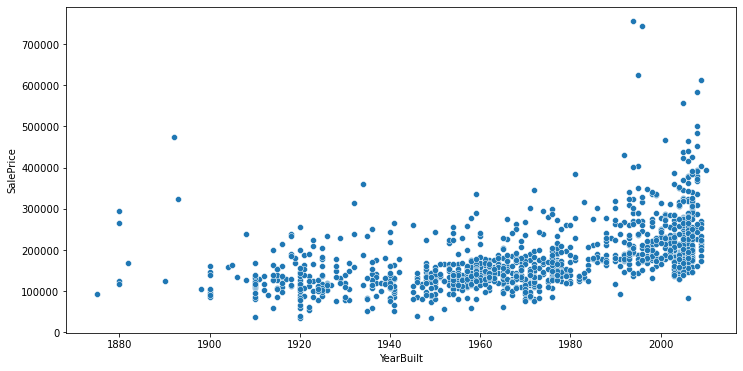

In [103]:
plt.figure(figsize=(12,6))
sn.scatterplot(x=df['YearBuilt'],y=df['SalePrice'])
plt.show()

We observe that as the built years continues to increase, the house prices have also increased but this is in line with the increase in time value of money .

In [104]:
list_cols[20]

'YearRemodAdd'

##### 21.'YearRemodAdd'

Remodel year (same as construction year if no remodeling or additions)

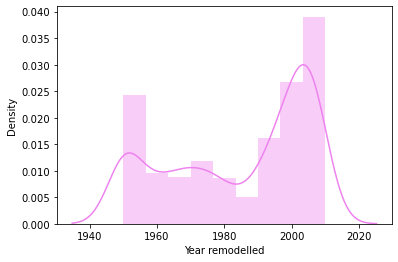

In [105]:
sn.distplot(df['YearRemodAdd'],color = 'violet')
plt.xlabel('Year remodelled')
plt.show()

We have house records for houses which are remodelled from year 1950. But the remodelled year is shown same as construction year if no remodelling and additions.

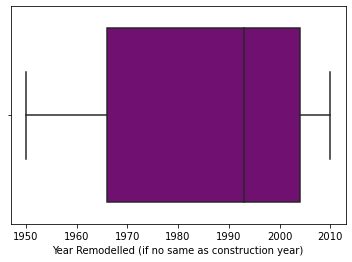

In [106]:
sn.boxplot(df['YearRemodAdd'],color = 'purple')
plt.xlabel('Year Remodelled (if no same as construction year)')
plt.show()

 We see no data points has been getting identified as outliers in above feature.

#### YearRemodAdd vs SalePrice

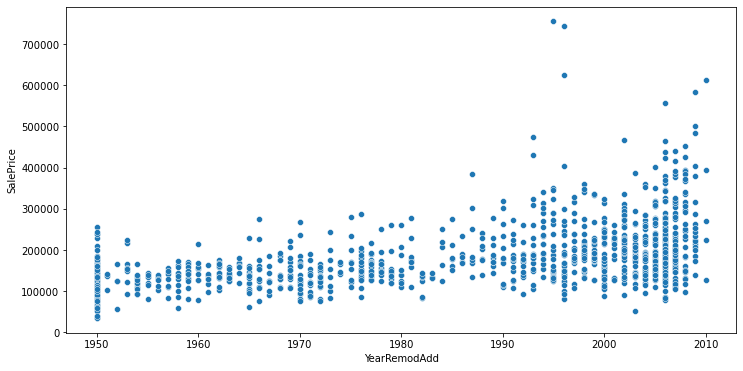

In [107]:
plt.figure(figsize=(12,6))
sn.scatterplot(x=df['YearRemodAdd'],y=df['SalePrice'])
plt.show()

We see no other trend than the general price increase with time trend.

In [108]:
list_cols[21]

'RoofStyle'

##### 22.'RoofStyle'

Type of roof

       Flat	-->Flat
       Gable -->	Gable
       Gambrel -->	Gabrel (Barn)
       Hip -->	Hip
       Mansard -->	Mansard
       Shed	--> Shed

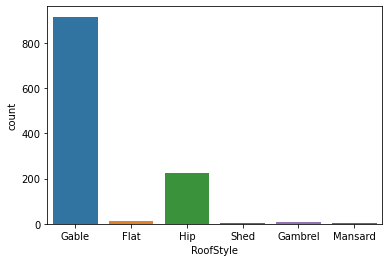

In [109]:
sn.countplot(df['RoofStyle'])
plt.show()

In our dataset, we have most sales records for houses with roofstyle 'Gable', around 200 house sales records for 'Hip' roofstyle and very very few sales records for houses with any other roofstyles.

#### RoofStyle vs SalePrice 

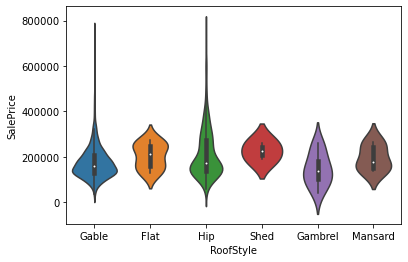

In [110]:
sn.violinplot(x=df['RoofStyle'],y=df['SalePrice'])
plt.show()

We observe a lot varying house prices for houses with roofstyle 'Gable' and 'Hip', and for other roofstyles we see that most of the house have price around USD 200,000.

In [111]:
list_cols[22]

'RoofMatl'

##### 23.'RoofMatl'

Roof material

       ClyTile -->	Clay or Tile
       CompShg -->	Standard (Composite) Shingle
       Membran -->	Membrane
       Metal -->	Metal
       Roll -->	Roll
       Tar&Grv -->	Gravel & Tar
       WdShake -->	Wood Shakes
       WdShngl -->	Wood Shingles

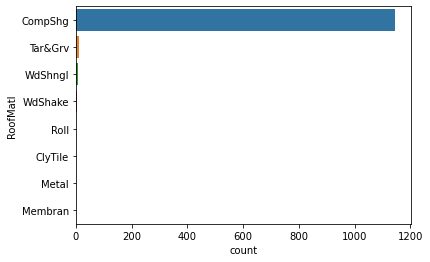

In [112]:
sn.countplot(y=df['RoofMatl'])
plt.show()

Almost all houses in our housing sales dataset have 'Standard (Composite) Shingle' rooftop. Very very few sales records for houses with 'Gravel & Tar' and 'Wood Shingles' rooftop are available to us.

#### RoofMatl Vs SalePrice

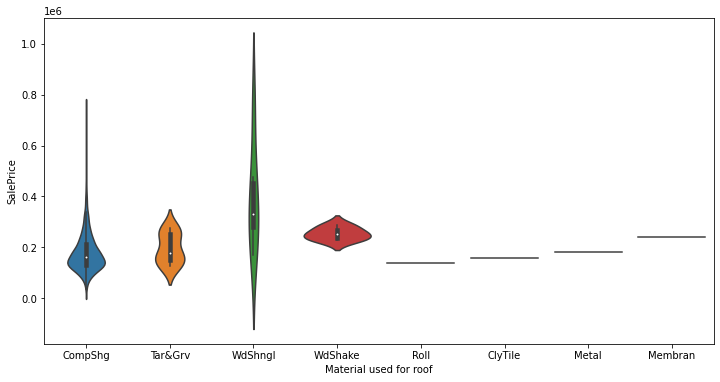

In [113]:
plt.figure(figsize=(12,6))
sn.violinplot(x=df['RoofMatl'],y=df['SalePrice'])
plt.xlabel('Material used for roof')
plt.show()

We observe that as per our housing dataset, house prices are varying much for houses with roofs of material wood shingles but we have very few records of wood shingle roof houses. We also see lot of house price variations for houses with roofs made up of Standard(Composite) shingles. We also observe from our housing dataset that houses with Wood Shake roofs have fetched more price than houses with roofs of Gravel & Tar.

In [114]:
list_cols[23]

'Exterior1st'

##### 24.'Exterior1st'

Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

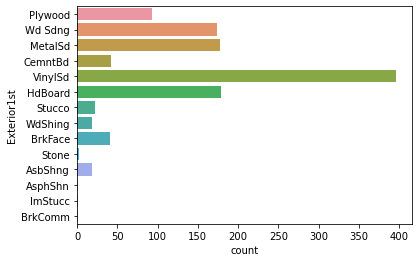

In [115]:
sn.countplot(y = df['Exterior1st'])
plt.show()

Our housing dataset has almost 400 house records of houses with 'Vinyl Siding' exterior, after that we have around 160 records for 'Hard Board' , 'Metal Siding' and 'wood siding' exterior houses. We have almost 100 house sale records for 'Plywood' exterior houses. Then we have less than 50 records for houses with exterior made of 'Cement Board' and 'Brick Face' and rest of all materials.

In [116]:
len(df['Exterior1st'][df['Exterior1st']=='VinylSd'])/len(df['Exterior1st'])*100

33.9041095890411

In [117]:
len(df['Exterior1st'][df['Exterior1st']=='Wd Sdng'])/len(df['Exterior1st'])*100

14.897260273972604

In [118]:
len(df['Exterior1st'][df['Exterior1st']=='MetalSd'])/len(df['Exterior1st'])*100

15.23972602739726

#### Exterior1st vs SalePrice

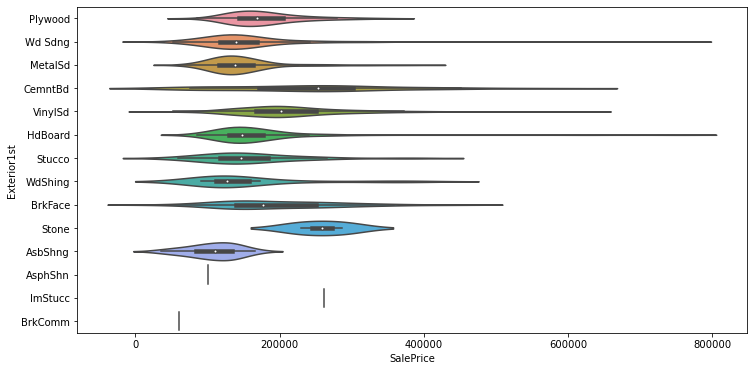

In [119]:
plt.figure(figsize=(12,6))
sn.violinplot(y=df['Exterior1st'],x=df['SalePrice'])
plt.show()

We observe that houses with exterior made up of wood siding & hard board have highest prices in our housing dataset and also for houses with these materials the prices are varying between range upto USD 800,000. We see a lot of price variations upto USD 600,000 in our dataset for houses with exterior of cement board, vinyl siding. We observe that houses with exterior made up of stone and asbestos shingles have sold for less prices as compared with others.

In [120]:
list_cols[24]

'Exterior2nd'

##### 25.'Exterior2nd'

Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

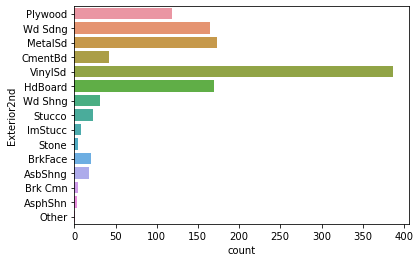

In [121]:
sn.countplot(y=df['Exterior2nd'])
plt.show()

Our housing dataset has around 275 houses with 2nd exterior of 'Vinyl Siding' while around 160 houses have 2nd exterior of each 'metal siding' or 'Wood siding' or 'hard board' exteriors. Around 100 house sale records are available for houses with 2nd exterior of 'Plywood' and less than 50 records are available for houses with 2nd exterior made of 'Cement board', 'wood shingles', 'Stucco', 'Imitation Stucco' , 'Stone' and other mentioned materials in the plot above.

#### Exterior2nd vs SalePrice

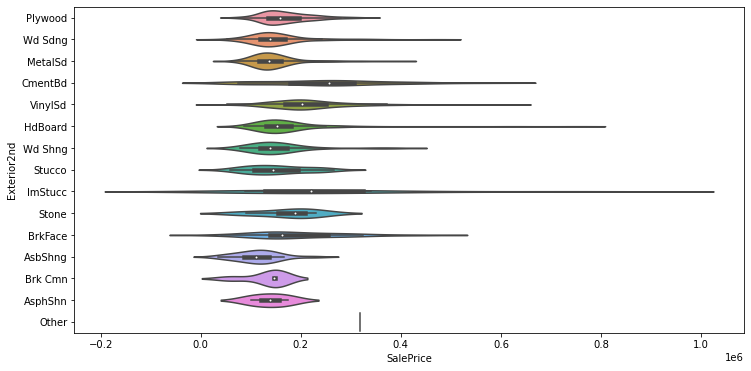

In [122]:
plt.figure(figsize=(12,6))
sn.violinplot(y=df['Exterior2nd'],x=df['SalePrice'])
plt.show()

We observe that as per our housing records, the house prices are high for 2nd exterior made up of imitation stucco but we have very few records for such houses. Houses with 2nd exterior of hard borad, vinyl siding and cement board also recorded high sale price .Wood siding and brick face as a 2ns exterior houses have also fetched high prices as compared to other houses with 2nd exterior made up of 

In [123]:
list_cols[25]

'MasVnrType'

##### 26.'MasVnrType'

Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	    None
       Stone	Stone

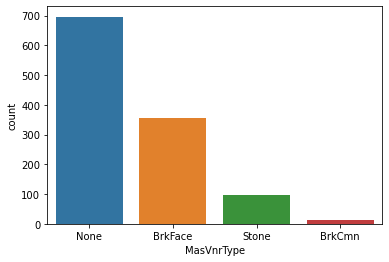

In [124]:
sn.countplot(df['MasVnrType'])
plt.show()

In our housing sales dataset, almost 700 houses do not have Masonry Veneer type walls. Around 300 houses sold have 'Brick Face' type, around 100 houses had 'Stone' type and very very few houses had 'Common Brick' type masonry veneer.

In [125]:
len(df['MasVnrType'][df['MasVnrType']=='None'])/len(df['MasVnrType'])*100

59.589041095890416

In [126]:
len(df['MasVnrType'][df['MasVnrType']=='BrkFace'])/len(df['MasVnrType'])*100

30.30821917808219

In [127]:
len(df['MasVnrType'][df['MasVnrType']=='Stone'])/len(df['MasVnrType'])*100

8.39041095890411

#### MasVnrType vs SalePrice

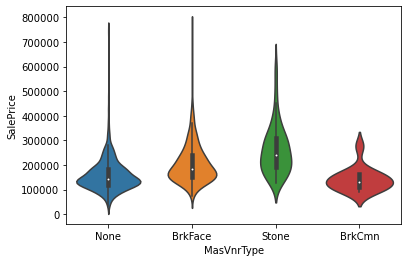

In [128]:
sn.violinplot(x=df['MasVnrType'],y=df['SalePrice'])
plt.show()

We see high sales prices are recorded in our dataset for houses with masonry veneer of brickface , followed by Stone .

In [129]:
list_cols[26]

'MasVnrArea'

##### 27.'MasVnrArea'

Masonry veneer area in square feet

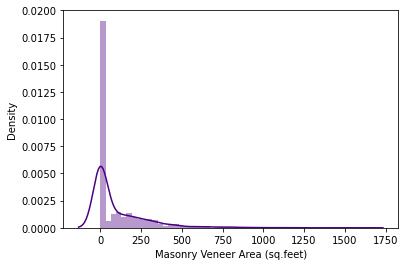

In [130]:
sn.distplot(df['MasVnrArea'],color = 'Indigo')
plt.xlabel('Masonry Veneer Area (sq.feet)')
plt.show()

In our dataset, we have most of the house sale records of houses with Masonry Veneer area less than 50 sq.feet. Very few houses sold have masonry veneer area more than 250 sq.feet.

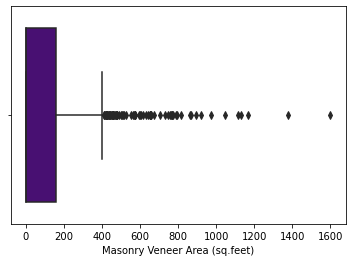

In [131]:
sn.boxplot(df['MasVnrArea'],color = 'Indigo')
plt.xlabel('Masonry Veneer Area (sq.feet)')
plt.show()

We observe in our housing records, few houses with Masonry veneer area more than 250 sq.feet and these data points are displayed as outliers. So instead of removing those outliers, we will normalize the data in this feature and then try to standardize it.

In [132]:
len(df['MasVnrArea'][df['MasVnrArea']==0])/len(df['MasVnrArea'])*100

59.24657534246576

#### MasVnrArea vs SalePrice

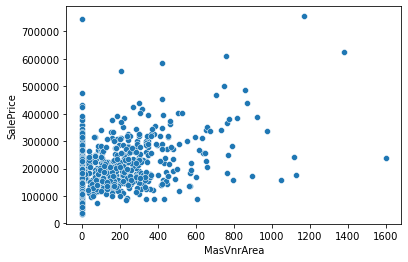

In [133]:
sn.scatterplot(x=df['MasVnrArea'],y=df['SalePrice'])
plt.show()

We observe that there is linear relationship between Masonry veneer area available and the house sale price. As the area increases, the price is also increasing.

In [134]:
list_cols[27]

'ExterQual'

##### 28.'ExterQual'

Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

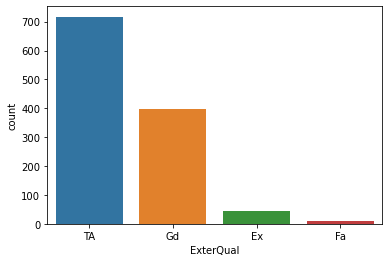

In [135]:
sn.countplot(df['ExterQual'])
plt.show()

Most of the houses in our housing sales dataset had 'Average/Typical' grade exterior, followed by that we have around 400 houses sold with exterior quality 'Good'. Very few houses with exterior 'Excellent' grade or 'Fair' grade are available to us.

In [136]:
len(df['ExterQual'][df['ExterQual']=='TA'])/len(df['ExterQual'])*100

61.38698630136986

In [137]:
len(df['ExterQual'][df['ExterQual']=='Gd'])/len(df['ExterQual'])*100

33.98972602739726

In [138]:
len(df['ExterQual'][df['ExterQual']=='Ex'])/len(df['ExterQual'])*100

3.6815068493150687

#### ExterQual vs SalePrice

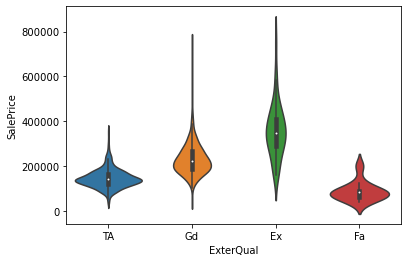

In [139]:
sn.violinplot(x=df['ExterQual'],y=df['SalePrice'])
plt.show()

We observe that, houses whose exterior is made of 'Excellent' quality have much varying prices upto USD 800,000, followed by houses with exterior of Good quality. As expected, houses with exterior material of Typical/Average and Fair quality have lower selling prices around USD 200,000.

In [140]:
list_cols[28]

'ExterCond'

##### 29.'ExterCond'

Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

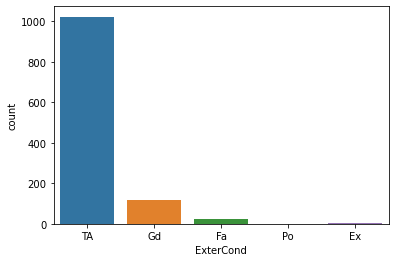

In [141]:
sn.countplot(df['ExterCond'])
plt.show()

Almost 90% of the houses sold in our dataset had exterior material in 'Average/Typical' condition. Around 100 houses had exterior material in 'Good' quality.

#### ExterCond vs SalePrice

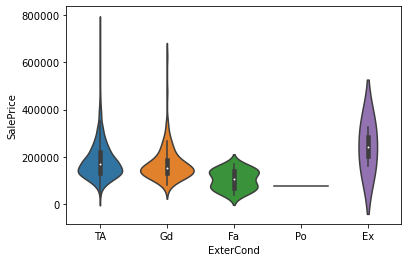

In [142]:
sn.violinplot(x=df['ExterCond'],y=df['SalePrice'])
plt.show()

We observe that houses with exterior in Excellent condition are having uniformly distributed sales prices upto USD 600,000. While houses with exterior in typical/average and good quality  have few records of high sale price but most of them are concentrated around USD 200,000.

In [143]:
list_cols[29]

'Foundation'

##### 30.'Foundation'

Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

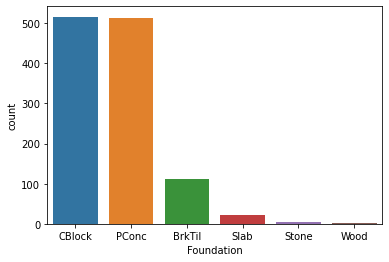

In [144]:
sn.countplot(df['Foundation'])
plt.show()

In our housing dataset, almost 500 houses have each of the 'Cinder Block' and 'Poured Concrete' foundation. 100 houses have 'Brick & Tile' foundation. Very few houses with foundation of stone and wood are available for us to analyse.

#### Foundation vs SalePrice

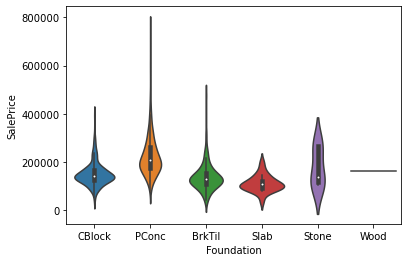

In [145]:
sn.violinplot(x=df['Foundation'],y=df['SalePrice'])
plt.show()

In our housing dataset, we observe that houses with poured concrete foundation had fetched higher sales prices followed by brick tile and cinder block foundation houses. Housess with stone foundation had also have uniform price distribution upto USD 400,000.

In [146]:
list_cols[30]

'BsmtQual'

##### 31.'BsmtQual'

Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

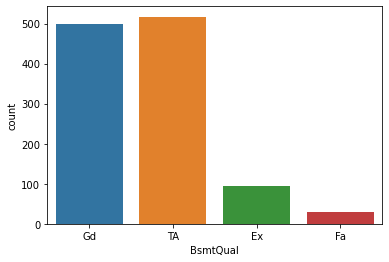

In [147]:
sn.countplot(df['BsmtQual'])
plt.show()

In our housing dataset, we have around 500 houses with basement of 'Good' height (90-99 inches) and also 'Typical' height(80-89 inches). We have almost 80-90 house sale records where basement is 'Excellent' height(100+ inches) and very few house sale records where basement is 'Fair' (70-79 inches).

#### BsmtQual vs SalePrice

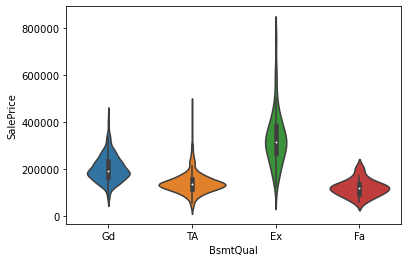

In [148]:
sn.violinplot(x=df['BsmtQual'],y=df['SalePrice'])
plt.show()

In our housing dataset, we observe that houses with basement height more than 100+ inches have sold at higher prices followed by expected order of basement heights i.e. 90-99 inches and 80-89 inch houses.

In [149]:
list_cols[31]

'BsmtCond'

##### 32.'BsmtCond'

Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

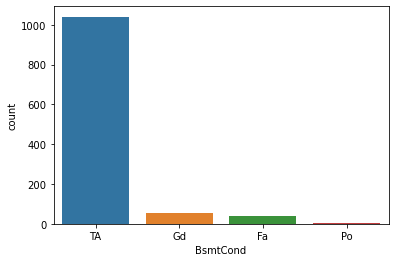

In [150]:
sn.countplot(df['BsmtCond'])
plt.show()

In our housing dataset, we have almost more than 1000 houses with 'Typical' quality basement where slight dampness is present, other than that very few houses have either 'Good' basement or 'Fair' basement in which along with dampness some crackling or settling is present.

In [151]:
len(df['BsmtCond'][df['BsmtCond']=='TA'])/len(df['BsmtCond'])*100

89.12671232876713

#### BsmtCond vs SalePrice

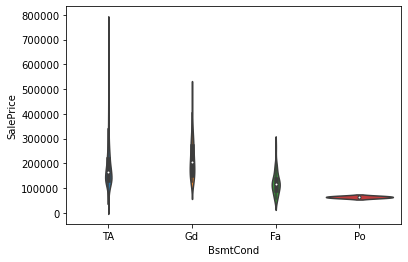

In [152]:
sn.violinplot(x=df['BsmtCond'],y=df['SalePrice'])
plt.show()

As expected, houses with basement with excellent quality have sold at higher prices followed by houses with basement quality good and typical/average basement quality houses and at last fair quality basement houses are sold at below USD 200,000.

In [153]:
list_cols[32]

'BsmtExposure'

##### 33.'BsmtExposure'

Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

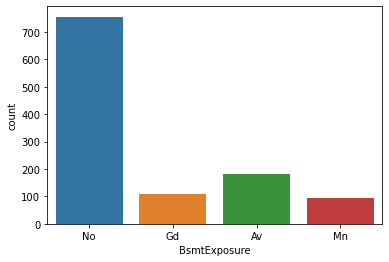

In [154]:
sn.countplot(df['BsmtExposure'])
plt.show()

Our housing sales dataset has more than 700 records of houses with 'No Exposure' to garden or walkout. Around 100 houses in our dataset have Good exposure and slightly more number of houses have 'Average' level exposure,.

In [155]:
len(df['BsmtExposure'][df['BsmtExposure']=='No'])/len(df['BsmtExposure'])*100

64.72602739726028

#### BsmtExposure vs SalePrice

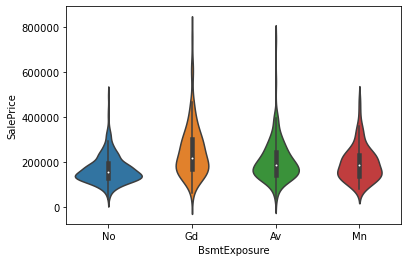

In [156]:
sn.violinplot(x=df['BsmtExposure'],y=df['SalePrice'])
plt.show()

We observe that, in our housing dataset houses with good or average or no basement exposure at all are not having any different effect on sales prices. So we will ignore this feature for model prediction.

In [157]:
list_cols[33]

'BsmtFinType1'

##### 34.'BsmtFinType1'

Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

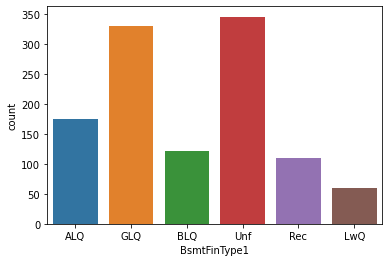

In [158]:
sn.countplot(df['BsmtFinType1'])
plt.show()

From our housing dataset, around 330 houses had 'Good Living Quarter' grade basements , while more than it near around 340 houses had unfinished basements. We have 160-170 records available for 'Average Living Quarter' grade basement. Near about 100 houses had 'Below Average Living Quarter' grade and 'Average Rec Room' grade basements.

In [159]:
len(df['BsmtFinType1'][df['BsmtFinType1']=='GLQ'])/len(df['BsmtFinType1'])*100

28.25342465753425

In [160]:
len(df['BsmtFinType1'][df['BsmtFinType1']=='Unf'])/len(df['BsmtFinType1'])*100

29.53767123287671

In [161]:
len(df['BsmtFinType1'][df['BsmtFinType1']=='ALQ'])/len(df['BsmtFinType1'])*100

14.897260273972604

#### BsmtFinType1 vs SalePrice

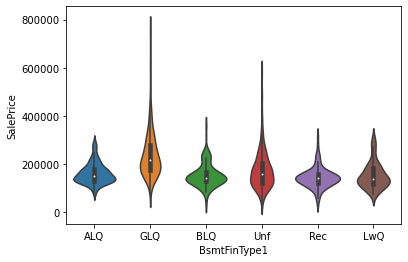

In [162]:
sn.violinplot(x=df['BsmtFinType1'],y=df['SalePrice'])
plt.show()

In our dataset, we observe that the few high house sale prices are recorded for houses with basements with Good Living Condition quality , but median value for all other basement types is almost same meaning houses with good living condition basements have high prices.

In [163]:
list_cols[34]

'BsmtFinSF1'

##### 35.'BsmtFinSF1'

Type 1 Basement finished area in square feet

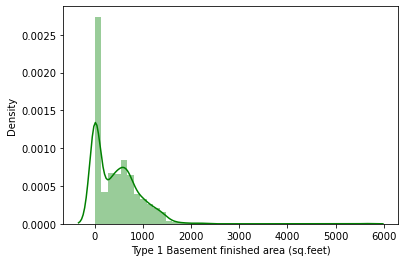

In [164]:
sn.distplot(df['BsmtFinSF1'],color = 'green')
plt.xlabel('Type 1 Basement finished area (sq.feet)')
plt.show()

Our housing dataset has around 700 houses with 'Type 1 Basement finished Area' less than 500 sq.feet. Around 310 houses have 'Type 1 Basement finished area' between 500-1000 sq.feet. Very few like 50 houses had 'Type 1 Basement area' more than 1000 sq.feet. We see the data distribution is right skewed becuase of the presence of few house records with 1st type basement area more than 2000 sq.feet

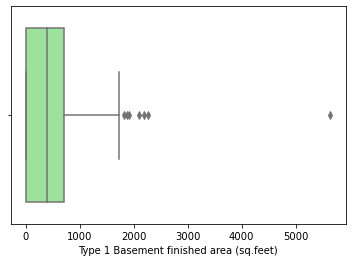

In [165]:
sn.boxplot(df['BsmtFinSF1'],color = 'lightgreen')
plt.xlabel('Type 1 Basement finished area (sq.feet)')
plt.show()

We see that the house records with type 1 basement area more than 1800 sq.feet have been shown as outliers away from whiskers but we will include those data points for our model prediction by normalizing them and then standardizing the distribution.

In [166]:
list_cols[35]

'BsmtFinType2'

##### 36.'BsmtFinType2'

Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

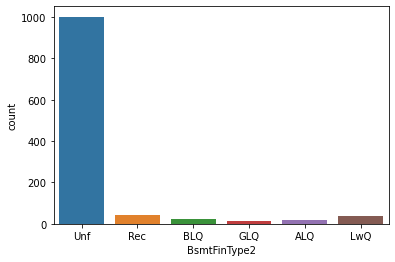

In [167]:
sn.countplot(df['BsmtFinType2'])
plt.show()

In our housing dataset, all houses had multiple types Type 2 basements. But around 1000 houses had Unfinished Type 2 basement area.

#### BsmtFinType2 vs SalePrice

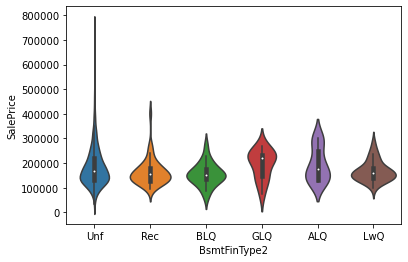

In [168]:
sn.violinplot(x=df['BsmtFinType2'],y=df['SalePrice'])
plt.show()

We observe that the median house price value for all basement types is same  but we see a lot of sale price variations for houses with multiple basements but 2nd is unfinished.

In [169]:
list_cols[36]

'BsmtFinSF2'

##### 37.'BsmtFinSF2'

Type 2 finished area in square feet

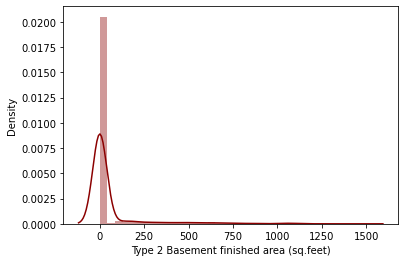

In [170]:
sn.distplot(df['BsmtFinSF2'],color = 'darkred')
plt.xlabel('Type 2 Basement finished area (sq.feet)')
plt.show()

In our housing records, for the houses with 2 types of Basement, more than 1000 houses have allocated 0 sq.feet of area for 2nd basement. Very few houses have more than 250 sq.feet of area for 2nd basement. We see the data distribution is right skewed because of few house records with very much area for 2nd basement.

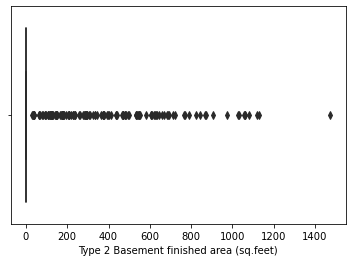

In [171]:
sn.boxplot(df['BsmtFinSF2'],color = 'darkred')
plt.xlabel('Type 2 Basement finished area (sq.feet)')
plt.show()

We observe that as more than 1000 houses have 2nd basement in unfinished state or have 0 sq.feet of area allocated for 2nd basement , so we will not treat the above data points which are away from whiskers as outliers but instead we will normalize the feature,

#### BsmtFinSF2 vs SalePrice

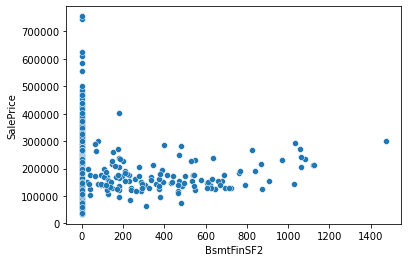

In [172]:
sn.scatterplot(x=df['BsmtFinSF2'],y=df['SalePrice'])
plt.show()

As expected, we see in our records, as the area for 2nd basement increases, the house sale price is also increasing.

In [173]:
list_cols[37]

'BsmtUnfSF'

##### 38.'BsmtUnfSF'

Unfinished square feet of basement area

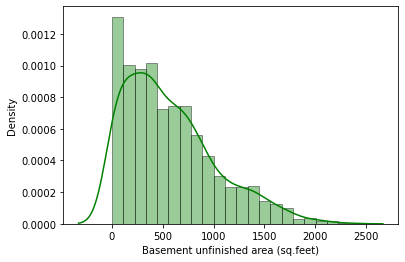

In [174]:
sn.distplot(df['BsmtUnfSF'],color = 'green',hist_kws={'edgecolor':'k'})
plt.xlabel('Basement unfinished area (sq.feet)')
plt.show()

We have around 600 house sale records for houses with less than 500 sq.feet of unfinished basement. We have around 370 houses with unfinished basement area between 500-1000 sq.feet. Very few sold houses had more than 1000 sq.feet of unfinished basement.

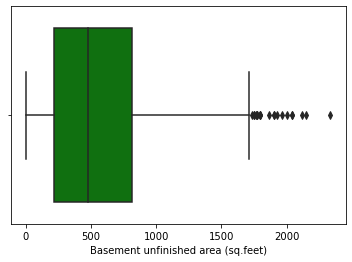

In [175]:
sn.boxplot(df['BsmtUnfSF'],color = 'green')
plt.xlabel('Basement unfinished area (sq.feet)')
plt.show()

We see that we have records for houses with unfinished basement area more than 1500 sq.feet as outliers but instead of ignoring them, we will try to normalize the feature data.

In [176]:
df['BsmtUnfSF'].min()

0

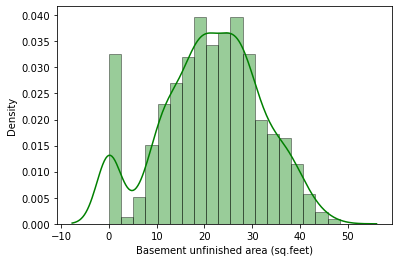

In [177]:
sn.distplot(np.sqrt(df['BsmtUnfSF']),color = 'green',hist_kws={'edgecolor':'k'})
plt.xlabel('Basement unfinished area (sq.feet)')
plt.show()

#### BsmtUnfSF vs SalePrice

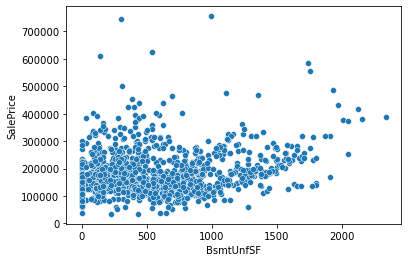

In [178]:
sn.scatterplot(x=df['BsmtUnfSF'],y=df['SalePrice'])
plt.show()

We see from our records as the unfinished basement surface area is increasing , there is slight decrease in the house sale price.

In [179]:
list_cols[38]

'TotalBsmtSF'

##### 39.'TotalBsmtSF'

Total square feet of basement area

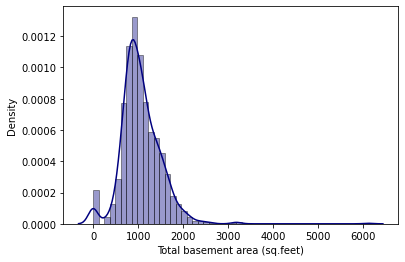

In [180]:
sn.distplot(df['TotalBsmtSF'],color = 'navy',hist_kws={'edgecolor':'k'})
plt.xlabel('Total basement area (sq.feet)')
plt.show()

We observe that from above plot, most of the houses sold have around 1000 sq.feet of total basement area. Very few houses sold had more than 2000 sq.feet of total basement area. We observe that the data distribution for Total Basement area feature is right skewed because of the presence of few house records with more than 2000 sq.feet of total basement area.

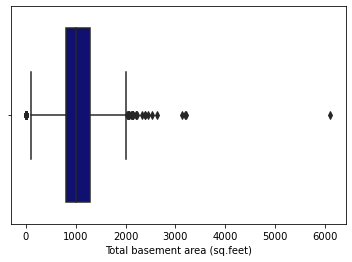

In [181]:
sn.boxplot(df['TotalBsmtSF'],color = 'navy')
plt.xlabel('Total basement area (sq.feet)')
plt.show()

We observe that, few house records with total basement area of more than 2000 sq.feet are displayed as outlying data points , so we will normalize the dataset.

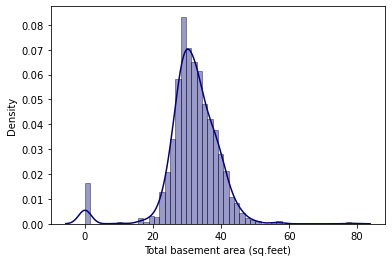

In [182]:
sn.distplot(np.sqrt(df['TotalBsmtSF']),color = 'navy',hist_kws={'edgecolor':'k'})
plt.xlabel('Total basement area (sq.feet)')
plt.show()

#### TotalBsmtSF vs SalePrice

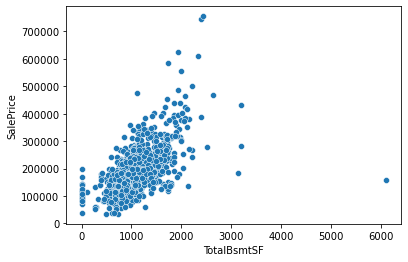

In [183]:
sn.scatterplot(x=df['TotalBsmtSF'],y=df['SalePrice'])
plt.show()

We observe in our housing dataset that as the total basement surface area increases, the sale price is also increasing.

In [184]:
list_cols[39]

'Heating'

##### 40.'Heating'

Type of heating
		
       Floor	Floor Furnace  
       GasA	    Gas forced warm air furnace  
       GasW	    Gas hot water or steam heat  
       Grav	    Gravity furnace  	
       OthW	    Hot water or steam heat other than gas  
       Wall	    Wall furnace  

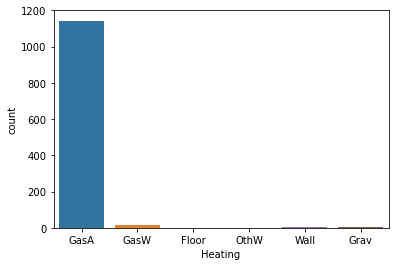

In [185]:
sn.countplot(df['Heating'])
plt.show()

In our housing dataset, we have almost all houses with 'Gas forced warm air furnace' facility for heating. Very very few houses had 'Gas hot water and steam' facility for steaming.

#### Heating vs SalePrice

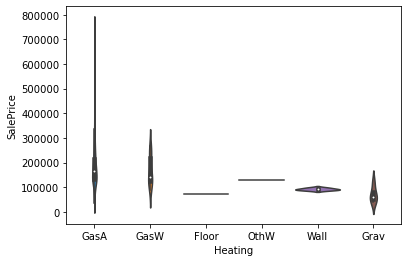

In [186]:
sn.violinplot(x=df['Heating'],y=df['SalePrice'])
plt.show()

We have more than 90% records for houses with Gas forced warm air furnaces and so the price variations for other furnace types can not be trusted, so we will ignore this feature for model prediction.

In [187]:
list_cols[40]

'HeatingQC'

##### 41.'HeatingQC'

Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

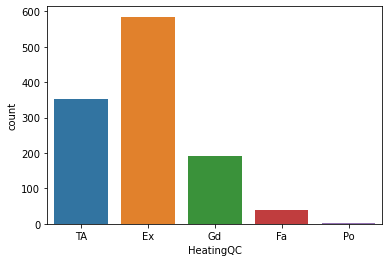

In [188]:
sn.countplot(df['HeatingQC'])
plt.show()

We see that most of the sold houses around 600 were having 'Excellent' heating conditions and the material quality was also excellent. Around 300 houses sold had 'Average' quality heating and material while 200 houses had 'Good' quality heating material in place.

#### HeatingQC vs SalePrice

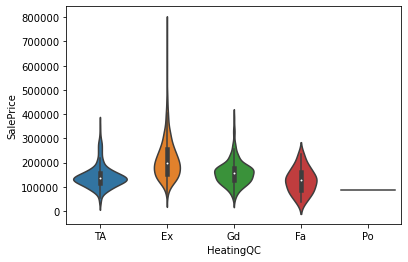

In [189]:
sn.violinplot(x=df['HeatingQC'],y=df['SalePrice'])
plt.show()

We observe from our housing records that, houses with excellent heating conditioning houses have varying prices upto USD 800,000. While the price range is decreasing as the heating conditioning of the house goes from good to Typical/Average to fair.

In [190]:
list_cols[41]

'CentralAir'

##### 42.'CentralAir'

Central air conditioning

       N	No
       Y	Yes

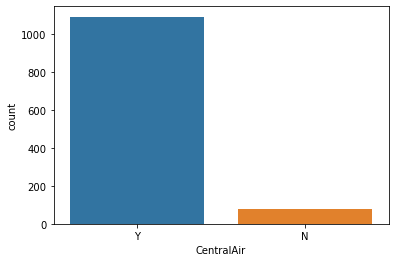

In [191]:
sn.countplot(df['CentralAir'])
plt.show()

Most of the houses in our housing record has a good central air conditioning while on the other hand very few house sale data is available for the houses with no central air conditioning.

In [192]:
list_cols[42]

'Electrical'

##### 43.'Electrical'

Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	    Mixed

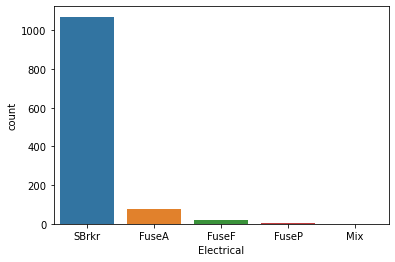

In [193]:
sn.countplot(df['Electrical'])
plt.show()

We observe that in our housing dataset, almost all i.e. around more than 1000 houses had Standard Circuit Breakers & Romex. We also have less than 100 house sales with electrical system of Fuse Box over 60 AMP and all Romex wiring which is of average grade as compared to Standard system. Very very few house sale records for available for houses having 60 AMP Fuse Box and Romex and Knob & Tube wiring which is considered Fair and poor grade systems.

#### Electrical vs SalePrice

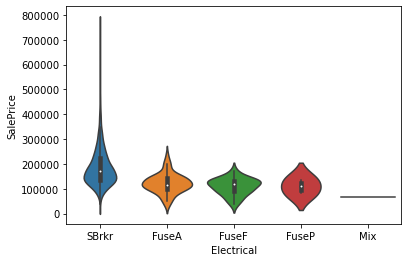

In [194]:
sn.violinplot(x=df['Electrical'],y=df['SalePrice'])
plt.show()

We observe high sales prices for the houses with electicity system of Standard Circuit Breakers & Romex. After it around USD 100,000 sales prices have been recorded for houses with Fuse Box over 60 Amp and all romex wiring which is of average grade and60 AMP Fuse Box and mostly Romex wiring (Fair) houses.

In [195]:
list_cols[43]

'1stFlrSF'

##### 44.'1stFlrSF'

First Floor area square feet

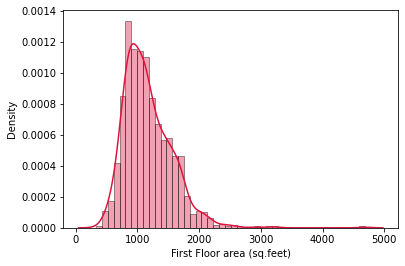

In [196]:
sn.distplot(df['1stFlrSF'],color = 'crimson',hist_kws={'edgecolor':'k'})
plt.xlabel('First Floor area (sq.feet)')
plt.show()

Our housing dataset has most of the houses with first floor surface area of around 1000 sq.feet. We have 300 house sale records for houses with first floor surface area between 1200-1600 sq.feet. We also have few house sale records like less than 100 for houses with first floor surface area of more than 2000 sq.feet. We observe a little right skewness in the distribution because of the few records with more than 3000 sq.feet of first floor area.

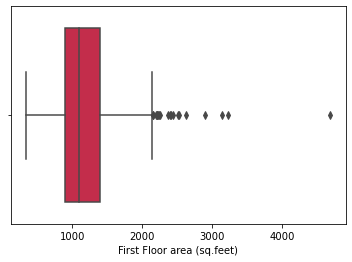

In [197]:
sn.boxplot(df['1stFlrSF'],color = 'crimson')
plt.xlabel('First Floor area (sq.feet)')
plt.show()

We observe that few house records with more than 2000 sq.feet of area have been represented as outliers in the dataset. So instead of removing those records, we will normalize this feature for our model prediction.

In [198]:
df['1stFlrSF'].min()

334

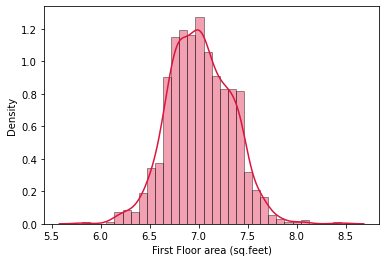

In [199]:
sn.distplot(np.log(df['1stFlrSF']),color = 'crimson',hist_kws={'edgecolor':'k'})
plt.xlabel('First Floor area (sq.feet)')
plt.show()

#### 1stFlrSF vs SalePrice

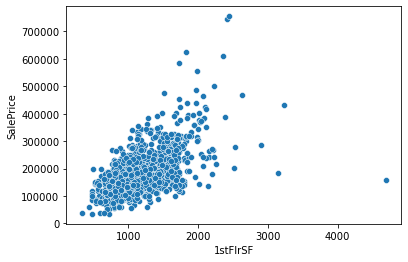

In [200]:
sn.scatterplot(x=df['1stFlrSF'],y=df['SalePrice'])
plt.show()

As expected, we observe that as the 1stFloor Surface Area increases the sale price of the house is also increasing.

In [201]:
list_cols[44]

'2ndFlrSF'

##### 45.'2ndFlrSF'

Second floor area in square feet

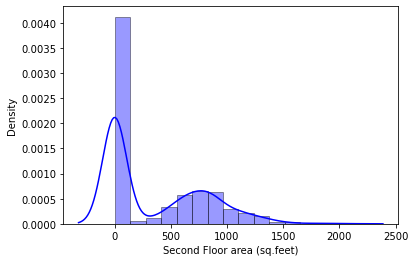

In [202]:
sn.distplot(df['2ndFlrSF'],color = 'blue',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Second Floor area (sq.feet)')
plt.show()

Most of the houses sold as per our housing records had less than 200 sq.feet of 2nd floor area. Very few houses have second floor area between 500-1500 sq.feet. We observe that the distribution has two maximums because most of the houses do not have 2nd floor.

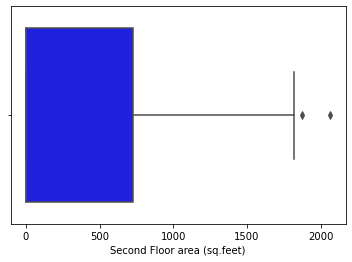

In [203]:
sn.boxplot(df['2ndFlrSF'],color = 'blue')
plt.xlabel('Second Floor area (sq.feet)')
plt.show()

We observe that as we have few house records with 2nd floor surface area of more than 1500 sq.feet, these data points have been shown as outliers.

#### 2ndFlrSF vs SalePrice

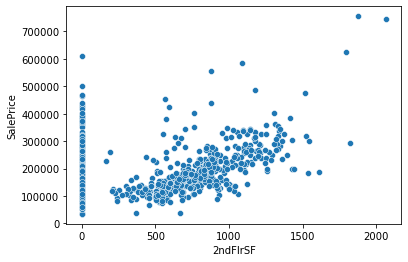

In [204]:
sn.scatterplot(x=df['2ndFlrSF'],y=df['SalePrice'])
plt.show()

We observe that for the houses with 2nd Floor, as the surface area is increasing , the house sale prices are also increasing.

In [205]:
list_cols[45]

'LowQualFinSF'

##### 46.'LowQualFinSF'

Area of Low quality finished square feet (all floors)

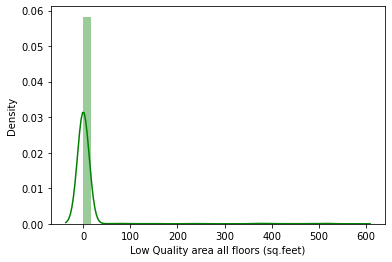

In [206]:
sn.distplot(df['LowQualFinSF'],color = 'green')
plt.xlabel('Low Quality area all floors (sq.feet)')
plt.show()

In our housing sale records, almost all houses had negligible i.e. less than 30-40 sq.feet of low quality area across all floors, but we see few records with more than 50 sq.feet of low quality area. We observe that the distribution is right skewed because of the few records with low quality area.

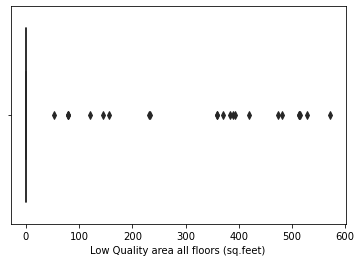

In [207]:
sn.boxplot(df['LowQualFinSF'],color = 'green')
plt.xlabel('Low Quality area all floors (sq.feet)')
plt.show()

We observe that in our dataset, almost all records have zero sq.feet of low quality areas, but few house sale records have some low quality surface areas which are displayed as outliers.

#### LowQualFinSF vs SalePrice

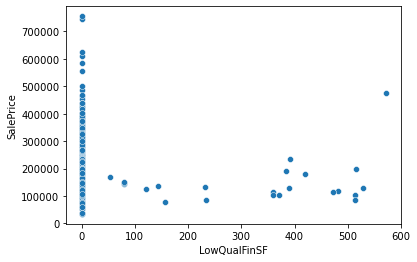

In [208]:
sn.scatterplot(x=df['LowQualFinSF'],y=df['SalePrice'])
plt.show()

We observe that sale prices for houses with some sq.feet of low quality finishing is less than USD 300,000.

In [209]:
list_cols[46]

'GrLivArea'

##### 47.'GrLivArea'

Above grade (ground) living area in square feet

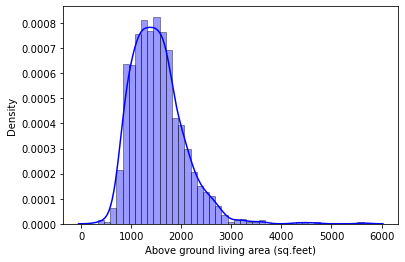

In [210]:
sn.distplot(df['GrLivArea'],color = 'blue',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Above ground living area (sq.feet)')
plt.show()

In our housing records, most of the houses have above ground living area between 1000 - 2000 sq.feet. Around 80-90 houses have above ground living area less than 1000 sq.feet. Less than 50 houses have above ground living area of more than 2500 sq.feet. We see a little right skewness in the above feature becuase of few house sale records with above ground living area more than 3000 sq.feet.

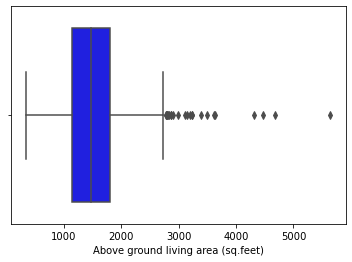

In [211]:
sn.boxplot(df['GrLivArea'],color = 'blue')
plt.xlabel('Above ground living area (sq.feet)')
plt.show()

We observe that, the few sale records with houses having above ground living area more than 3000 sq.feet are displayed as outliers, instead of removing these records we will normalize the feature.

In [212]:
df['GrLivArea'].min()

334

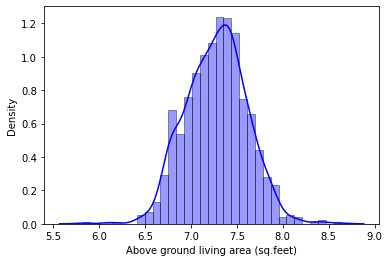

In [213]:
sn.distplot(np.log(df['GrLivArea']),color = 'blue',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Above ground living area (sq.feet)')
plt.show()

#### GrLivArea vs SalePrice

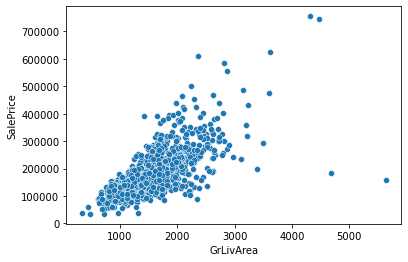

In [214]:
sn.scatterplot(x=df['GrLivArea'],y=df['SalePrice'])
plt.show()

From our housing dataset, we observe that as the above ground living area increases, the SalePrice of house is also increasing.

In [215]:
list_cols[47]

'BsmtFullBath'

##### 48.'BsmtFullBath'

No. of basement full bathrooms

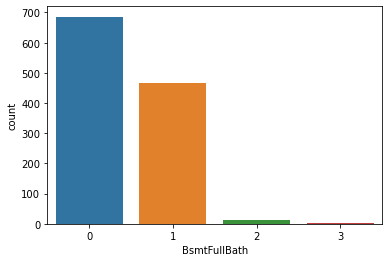

In [216]:
sn.countplot(df['BsmtFullBath'])
plt.show()

In our house sales record, we have around 700 houses with no full bathroom in basement, while around 450 houses have at least 1 full bathroom in basement. Very very few sell records are available for houses more than 1 full bathroom in basement.

#### BsmtFullBath vs SalePrice

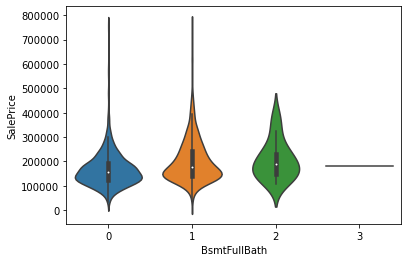

In [217]:
sn.violinplot(x=df['BsmtFullBath'],y=df['SalePrice'])
plt.show()

In our housing dataset, we do not see any difference between median value for price of house with zero or 1 or 2 fullbathrooms in the basement, but we see few records available for high sale price for house with 1 full bathroom in basement.

In [218]:
list_cols[48]

'BsmtHalfBath'

##### 49.'BsmtHalfBath'

No. of half bathrooms in Basement 

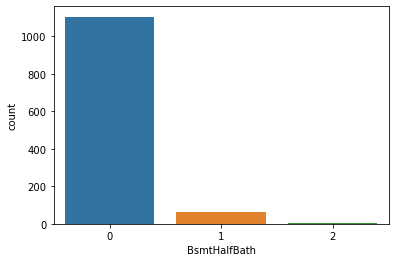

In [219]:
sn.countplot(df['BsmtHalfBath'])
plt.show()

In our housing records, we have most of the houses without half bathrooms in the basement. Very few houses have at least 1 half bathroom.

#### BsmtHalfBath vs SalePrice

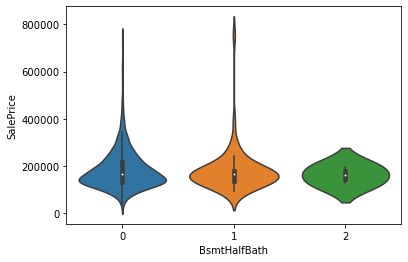

In [220]:
sn.violinplot(x=df['BsmtHalfBath'],y=df['SalePrice'])
plt.show()

We observe here also that the median sale price is same for houses with zero or 1 or 2 half bathrooms in the basement but we see few records for high sale price for house with 1 half bathroom in basement.

In [221]:
list_cols[49]

'FullBath'

##### 50.'FullBath'

No. of full bathrooms above ground

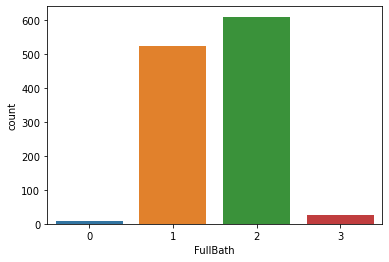

In [222]:
sn.countplot(df['FullBath'])
plt.show()

Most of the houses sold dataset has houses with at least 1 or 2 full bathrooms.

#### FullBath vs SalePrice

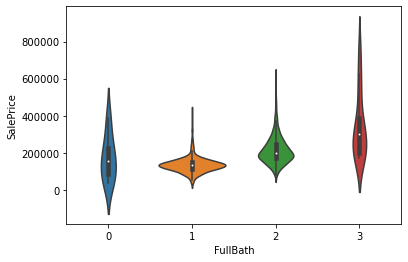

In [223]:
sn.violinplot(x=df['FullBath'],y=df['SalePrice'])
plt.show()

We observe that as the no. of full bathrooms in a house increases, the price of the house is also increasing.

In [224]:
list_cols[50]

'HalfBath'

##### 51.'HalfBath'

No. of half bathrooms above ground

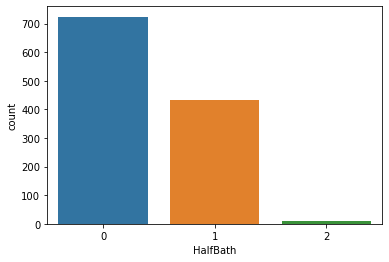

In [225]:
sn.countplot(df['HalfBath'])
plt.show()

In our housing dataset, we have around 700 houses records with no half bathroom and around 400 houses had 1 half bathroom.

#### HalfBath vs SalePrice

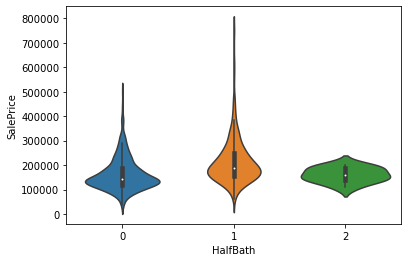

In [226]:
sn.violinplot(x=df['HalfBath'],y=df['SalePrice'])
plt.show()

We observe that houses with just 1 halfbath have recorded high sale price as compared to houses with 2 halfbathrooms or no halfbathrooms.

In [227]:
list_cols[51]

'BedroomAbvGr'

##### 52.'BedroomAbvGr'

No. of bedrooms above ground (does NOT include basement bedrooms)

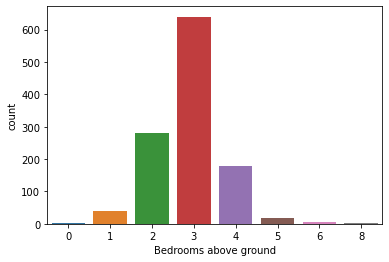

In [228]:
sn.countplot(df['BedroomAbvGr'])
plt.xlabel('Bedrooms above ground')
plt.show()

In our housing dataset, more than 600 houses sold had 3 bedrooms, while around 280-290 houses had 2 bedrooms. After it, we have around 200 sale records for houses with 4 bedrooms. Very few house records have more than 4 and less than 2 bedrooms.

#### BedroomAbvGr vs SalePrice

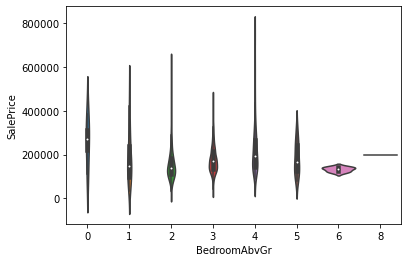

In [229]:
sn.violinplot(x=df['BedroomAbvGr'],y=df['SalePrice'])
plt.show()

Although, the median house price for houses with 1-5 bedrooms is same, we observe more varying prices upto USD 800,000 for houses with 4 bedrooms.

In [230]:
list_cols[52]

'KitchenAbvGr'

##### 53.'KitchenAbvGr'

No. of kitchen above ground

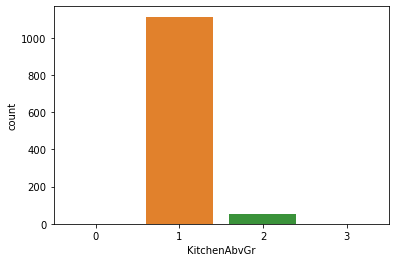

In [231]:
sn.countplot(df['KitchenAbvGr'])
plt.show()

As expected, we see that most of the houses sell records have 1 kitchen , very very few houses had 2 kitchens.

#### KitchenAbvGr vs SalePrice

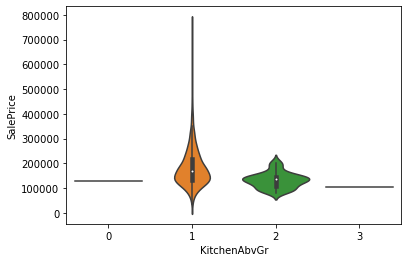

In [232]:
sn.violinplot(x=df['KitchenAbvGr'],y=df['SalePrice'])
plt.show()

We have max records for houses with 1 kitchen and the prices for them are also varying a lot. We also have few records with 2 kitchen in the house but the price range for them is not more than USD 200,000.

In [233]:
list_cols[53]

'KitchenQual'

##### 54.'KitchenQual'

Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

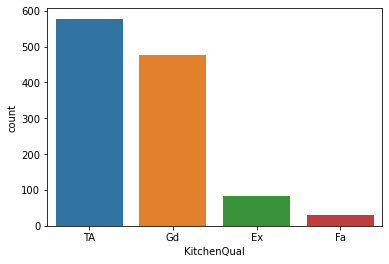

In [234]:
sn.countplot(df['KitchenQual'])
plt.show()

In our housing dataset, we have around 580-590 house sale records with 'Typical/Average' quality kitchen while around 480 sale records of houses with 'Good' quality kitchens. We have very few houses with 'Excellent' quality as well as 'Fair' quality kithcens.

#### KitchenQual vs SalePrice

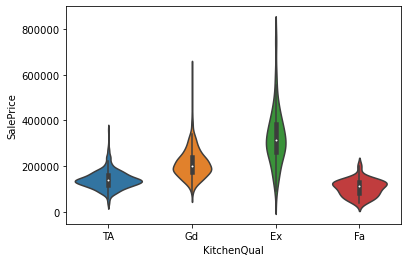

In [235]:
sn.violinplot(x=df['KitchenQual'],y=df['SalePrice'])
plt.show()

we observe high house prices for excellent quality kitchen houses , followed by houses having 'good' quality kitchen. Less prices are recorded for houses with kitchen in Average or Fair conditions.

In [236]:
list_cols[54]

'TotRmsAbvGrd'

##### 55.'TotRmsAbvGrd'

No. of total rooms above grade (does not include bathrooms)

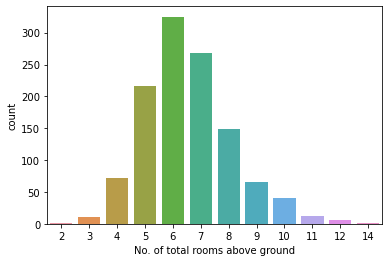

In [237]:
sn.countplot(df['TotRmsAbvGrd'])
plt.xlabel('No. of total rooms above ground')
plt.show()

Our housing dataset has, around 330 houses with 6 bedrooms, around 250 houses with 7 bedrooms, around 200 houses with 5 bedrooms, around 150 houses with 8 bedrooms. We have less than 100 records for more than 8 bedrooms as well as for less than 5.

#### TotRmsAbvGrd vs SalePrice

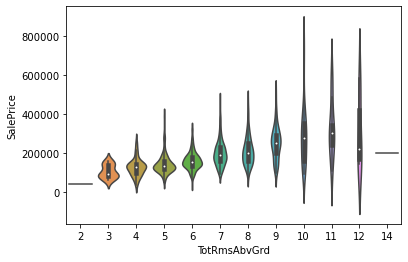

In [238]:
sn.violinplot(x=df['TotRmsAbvGrd'],y=df['SalePrice'])
plt.show()

We observe from our housing dataset that as the number of rooms above ground are increasing, the saleprice of the house is also increasing.

In [239]:
list_cols[55]

'Functional'

##### 56.'Functional'

Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

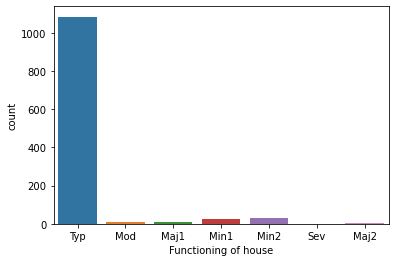

In [240]:
sn.countplot(df['Functional'])
plt.xlabel('Functioning of house')
plt.show()

From above plot, we see that almost all of the houses sold as per our dataset were in typical functioning condition. Very very few house sale records for houses with some major and minor deductions.

#### Functional vs SalePrice

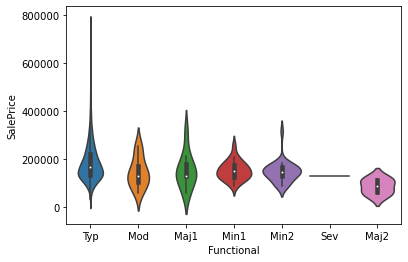

In [241]:
sn.violinplot(x=df['Functional'],y=df['SalePrice'])
plt.show()

We observe that houses in typically functioning conditioning have fetched more sale prices. Houses with some kind of major or minor damage have gone upto USD 400,000 max.

In [242]:
list_cols[56]

'Fireplaces'

##### 57.'Fireplaces'

Number of fireplaces

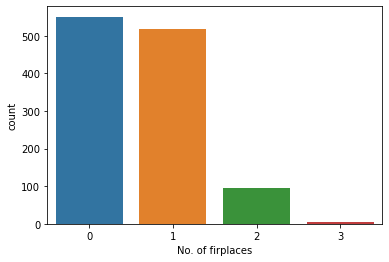

In [243]:
sn.countplot(df['Fireplaces'])
plt.xlabel('No. of firplaces')
plt.show()

In our housing dataset, we observe that around 550 houses did not have fireplace while around 500 houses had at least 1 fireplace. Less than 100 house sale records are available for houses with more than 1 firplace.

In [244]:
len(df['Fireplaces'][df['Fireplaces']==1])/len(df['Fireplaces'])*100

44.34931506849315

In [245]:
len(df['Fireplaces'][df['Fireplaces']==2])/len(df['Fireplaces'])*100

8.047945205479452

In [246]:
len(df['Fireplaces'][df['Fireplaces']==3])/len(df['Fireplaces'])*100

0.4280821917808219

#### Fireplaces vs SalePrice

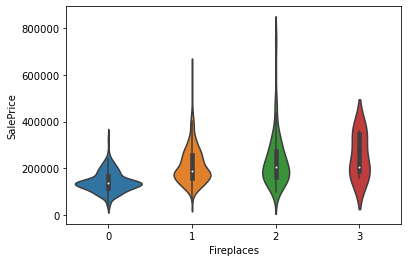

In [247]:
sn.violinplot(x=df['Fireplaces'],y=df['SalePrice'])
plt.show()

We observe that, having a firplace in the house has fetched more price.

In [248]:
list_cols[57]

'FireplaceQu'

##### 58.'FireplaceQu'

Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

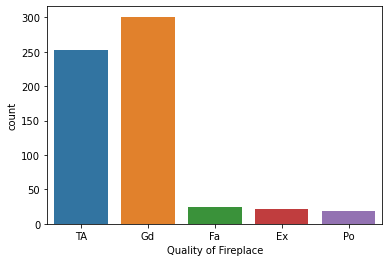

In [249]:
sn.countplot(df['FireplaceQu'])
plt.xlabel('Quality of Fireplace')
plt.show()

In our housing dataset, among houses having firplace, more than 250 houses had 'Good' quality fireplaces while 250 houses had 'Typical/Average' quality fireplace. We have very few records available for houses with 'Excellent' and 'Fair' and also few 'Poor' quality firplace houses.

#### FireplaceQu vs SalePrice

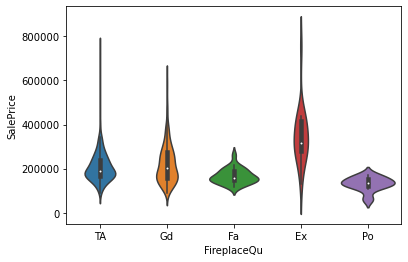

In [250]:
sn.violinplot(x=df['FireplaceQu'],y=df['SalePrice'])
plt.show()

We observe that houses with firplace quality excellent, good and typical/average have fetched more prices.

In [251]:
list_cols[58]

'GarageType'

##### 59.'GarageType'

Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

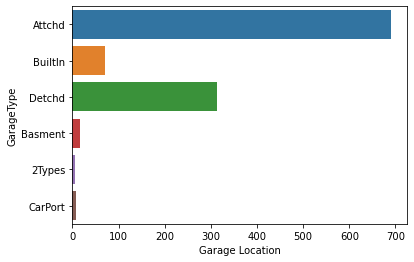

In [252]:
sn.countplot(y = df['GarageType'])
plt.xlabel('Garage Location')
plt.show()

In our housing dataset, we have more than 700 house records with attached garage facility, while around 300 houses have garage detached from house. We also have around 100 houses with Built-In garage facility. We have very few records for houses with garage in basement as well as 2 types of garages,

#### GarageType vs SalePrice

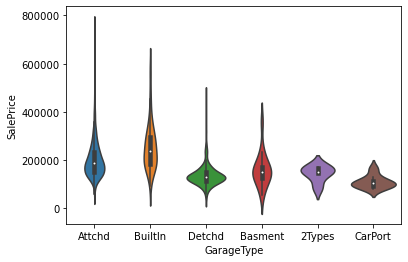

In [253]:
sn.violinplot(x=df['GarageType'],y=df['SalePrice'])
plt.show()

Houses with attached or built-in garages have sold for much higher prices as compared to houses with detached or basement garages.

In [254]:
list_cols[59]

'GarageYrBlt'

##### 60.'GarageYrBlt'

Year garage was built

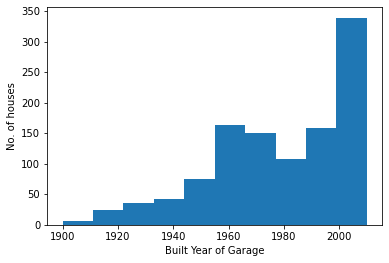

In [255]:
plt.hist(df['GarageYrBlt'])
plt.xlabel('Built Year of Garage')
plt.ylabel('No. of houses')
plt.show()

From above plot , we conclude that building garage is a trend which has linear with the progress of industrial revolution. We see there is sharp increase around year 1960 and at the start of new millenium 

#### GarageYrBlt vs SalePrice

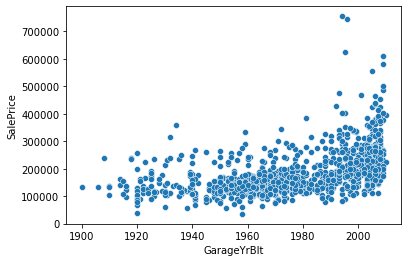

In [256]:
sn.scatterplot(x=df['GarageYrBlt'],y=df['SalePrice'])
plt.show()

We observe that for the houses with newly built garages have fetched more prices but this increase in salesprice can be attributed to increase in house sale prices along with increases in time.

In [257]:
list_cols[60]

'GarageFinish'

##### 61.'GarageFinish'

Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

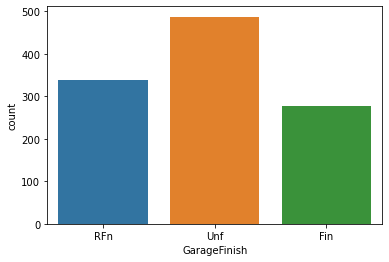

In [258]:
sn.countplot(df['GarageFinish'])
plt.show()

We see that most of the houses in our dataset has unfinished interior in their garages, around 300 houses with garages have rough finishing and around 200 houses had finished interior in garages.

#### GarageFinish vs SalePrice

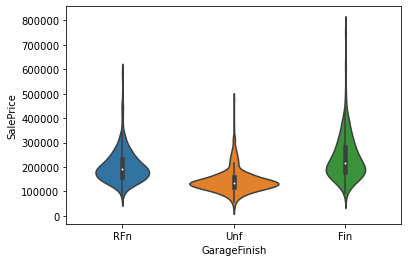

In [259]:
sn.violinplot(x=df['GarageFinish'],y=df['SalePrice'])
plt.show()

We observe that houses with rough finishing and fully finished garages have more sale price than unfinished garage houses.

In [260]:
list_cols[61]

'GarageCars'

##### 62.'GarageCars'

Size of garage in car capacity

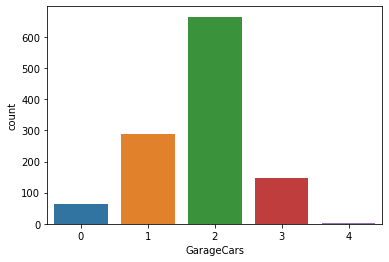

In [261]:
sn.countplot(df['GarageCars'])
plt.show()

More than 600 houses in our housing dataset had houses with garages that can park 2 cars at a time, around 300 houses with garages that can withstand 1 car. We also have around 100 house sale records for houses with garages that can store 3 or 4 cars. Very few around 60-70 houses do not have garages.

#### GarageCars vs SalePrice

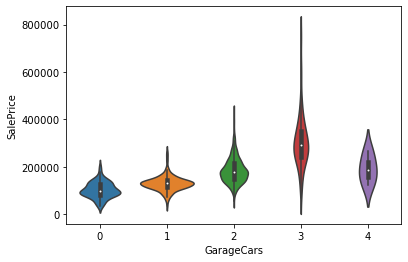

In [262]:
sn.violinplot(x=df['GarageCars'],y=df['SalePrice'])
plt.show()

As number of car capacity of a garage is increasing, the price for the house with those garages also increasing.

In [263]:
list_cols[62]

'GarageArea'

##### 63.'GarageArea'

Size of garage in square feet

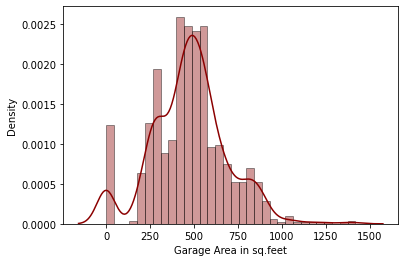

In [264]:
sn.distplot(df['GarageArea'],color = 'darkred',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Garage Area in sq.feet')
plt.show()

We see that , most of the houses in our housing records have around 450-600 sq.feet of garage area. Around 200 houses had garages with area 250-400 and 600-800 sq.feet. ALso, around 100-170 houses had 200 and 800 sq.feet of garage area.

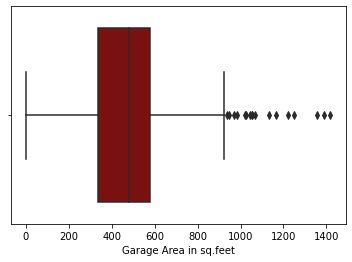

In [265]:
sn.boxplot(df['GarageArea'],color = 'darkred')
plt.xlabel('Garage Area in sq.feet')
plt.show()

We have few house sale records with more than 1000 sq.feet of garage area which have been depicted as outliers in above plot.

In [266]:
df['GarageArea'].min()

0

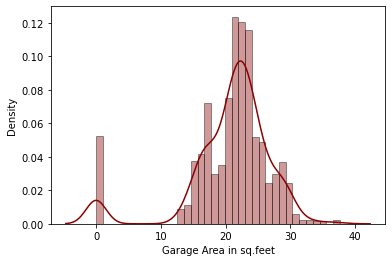

In [267]:
sn.distplot(np.sqrt(df['GarageArea']),color = 'darkred',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Garage Area in sq.feet')
plt.show()

#### GarageArea vs SalePrice

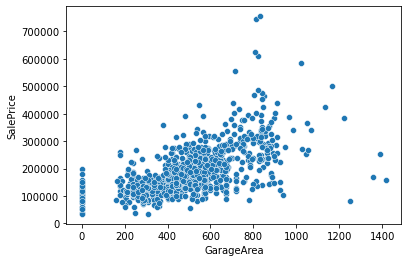

In [268]:
sn.scatterplot(x=df['GarageArea'],y=df['SalePrice'])
plt.show()

We obsere, in general, as the garage area is increasing the house prices are also increasing. We observe high prices for houses with garage area around 800 sq.feet. 

In [269]:
list_cols[63]

'GarageQual'

##### 64.'GarageQual'

Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

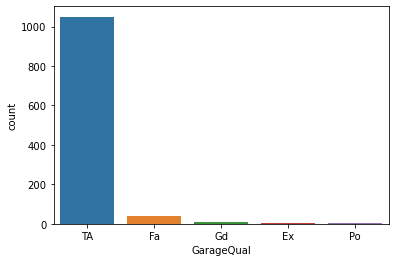

In [270]:
sn.countplot(df['GarageQual'])
plt.show()

From above plot we see that, almost all house sold from our dataset had garages with 'Typical/Average' quality.

#### GarageQual vs SalePrice

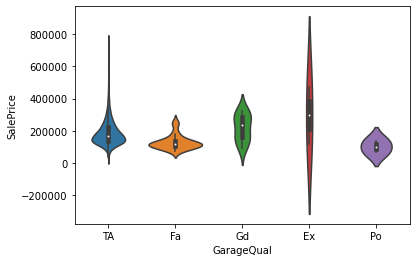

In [271]:
sn.violinplot(x=df['GarageQual'],y=df['SalePrice'])
plt.show()

We observe that houses with excellent garages have fetched high sale price.

In [272]:
list_cols[64]

'GarageCond'

##### 65.'GarageCond'

Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

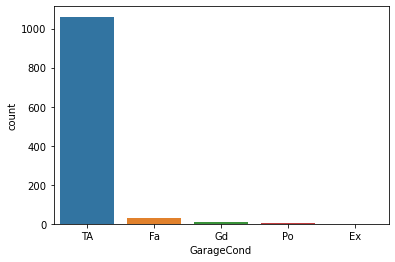

In [273]:
sn.countplot(df['GarageCond'])
plt.show()

From above plot, we observe that most of the houses in our dataset had garages in 'Typical/Average' maintained condition.

#### GarageCond vs SalePrice

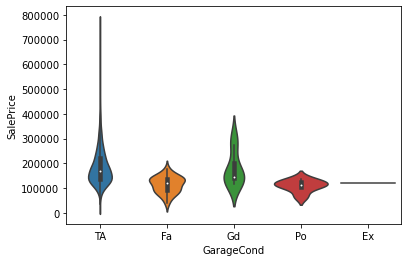

In [274]:
sn.violinplot(x=df['GarageCond'],y=df['SalePrice'])
plt.show()

We observe that we do not have many records for houses where garages are in excellent condition but we see that in general houses with garages in good or typical/average condition have fetched more prices.

In [275]:
list_cols[66]

'WoodDeckSF'

##### 67.'WoodDeckSF'

Wood deck area in square feet

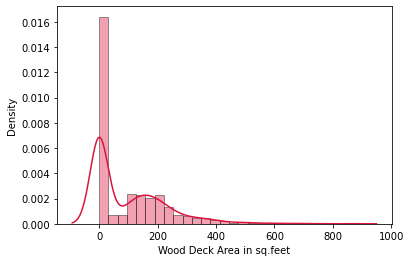

In [276]:
sn.distplot(df['WoodDeckSF'],color = 'crimson',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Wood Deck Area in sq.feet')
plt.show()

From above plot, we observe that most of the houses in our housing dataset didnot have or had less than 50 sq.feet of wood deck area. Around 300 houses had 100-200 sq.feet of wood deck area while less than 50 houses had wodd deck area more than 300 sq.feet

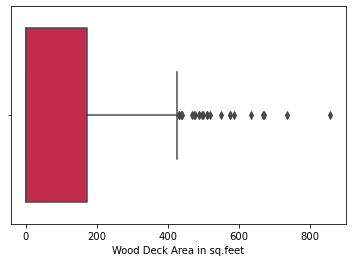

In [277]:
sn.boxplot(df['WoodDeckSF'],color = 'crimson')
plt.xlabel('Wood Deck Area in sq.feet')
plt.show()

We observe that we have few records with house with wood deck area of more than 400 sq.feet which have shown as outliers in above plot.

In [278]:
len(df['WoodDeckSF'][df['WoodDeckSF']==0])/len(df['WoodDeckSF'])*100

51.62671232876712

#### WoodDeckSF vs SalePrice

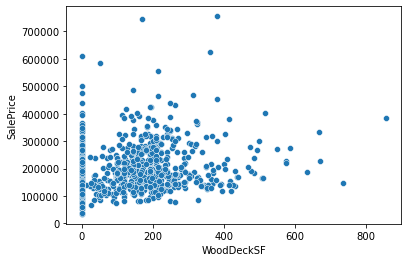

In [279]:
sn.scatterplot(x=df['WoodDeckSF'],y=df['SalePrice'])
plt.show()

We observe high sale prices for houses with deck area of around 400 sq.feet, we observe price decrease and price saturation for houses with deck area more than 400 sq.feet

In [280]:
list_cols[67]

'OpenPorchSF'

##### 68.'OpenPorchSF'

Open porch area in square feet

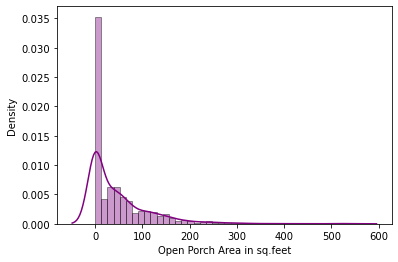

In [281]:
sn.distplot(df['OpenPorchSF'],color = 'purple',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Open Porch Area in sq.feet')
plt.show()

From above plot, we observe that our housing dataset houses had around 800 houses with Open Porch area less than 50 sq.feet, while around 200 houses had open porch area of around 100 sq.feet. Very few records of houses with open porch area more than 200 sq.feet are available to us. We observe the distribution is right skewed because of the presence of few house records with area more than 200 sq.feet

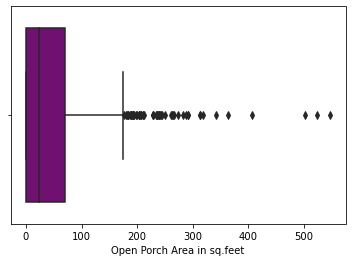

In [282]:
sn.boxplot(df['OpenPorchSF'],color = 'purple')
plt.xlabel('Open Porch Area in sq.feet')
plt.show()

In above plot, we observe that in our housing dataset, we have few records with open porch area more than 200 sq.feet which are displayed as outliers.

In [283]:
len(df['OpenPorchSF'][df['OpenPorchSF']==0])/len(df['OpenPorchSF'])*100

45.46232876712329

#### OpenPorchSF vs SalePrice

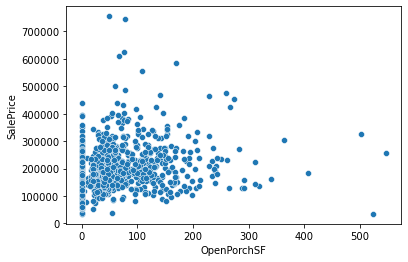

In [284]:
sn.scatterplot(x=df['OpenPorchSF'],y=df['SalePrice'])
plt.show()

We observe that houses with open porch area of around 100 sq.feet have fetched more sale prices. As the porch area increases beyond 150 sq.feet we observe gradual decrease in the selling price of the house. 

In [285]:
list_cols[68]

'EnclosedPorch'

##### 69.'EnclosedPorch'

Enclosed porch area in square feet

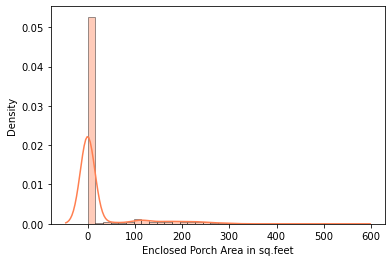

In [286]:
sn.distplot(df['EnclosedPorch'],color = 'coral',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Enclosed Porch Area in sq.feet')
plt.show()

From above plot, we see that in our housing records almost all records are of houses with enclosed porch area of less than 50 sq.feet.

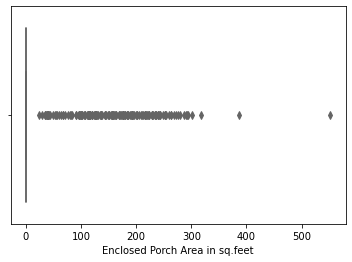

In [287]:
sn.boxplot(df['EnclosedPorch'],color = 'coral')
plt.xlabel('Enclosed Porch Area in sq.feet')
plt.show()

We observe that as almost all house records have almost none enclosed porch, so all few house records with enclosed porch area have been displayed as outliers.

In [288]:
len(df['EnclosedPorch'][df['EnclosedPorch']==0])/len(df['EnclosedPorch'])*100

85.53082191780823

#### EnclosedPorch vs SalePrice

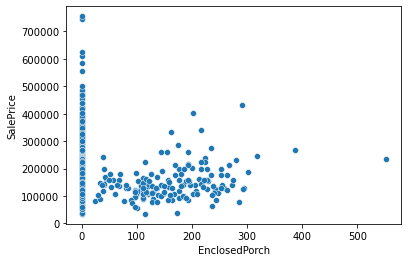

In [289]:
sn.scatterplot(x=df['EnclosedPorch'],y=df['SalePrice'])
plt.show()

We observe increase in enclosed porch area of a house has no significant effect on price variations.

In [290]:
list_cols[69]

'3SsnPorch'

##### 70.'3SsnPorch'

Three season porch area in square feet

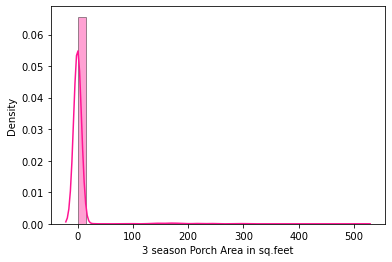

In [291]:
sn.distplot(df['3SsnPorch'],color = 'deeppink',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('3 season Porch Area in sq.feet')
plt.show()

From above plot, we see that our housing dataset has almost all records of houses with less than 50 sq.feet of three season porch.

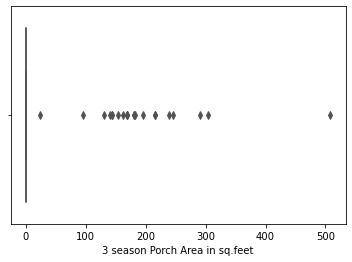

In [292]:
sn.boxplot(df['3SsnPorch'],color = 'deeppink')
plt.xlabel('3 season Porch Area in sq.feet')
plt.show()

We observe as we have very few house sale records with 3 season porch area, all the records are displayed as outliers.

In [293]:
len(df['3SsnPorch'][df['3SsnPorch']==0])/len(df['3SsnPorch'])*100

98.11643835616438

#### 3SsnPorch vs SalePrice

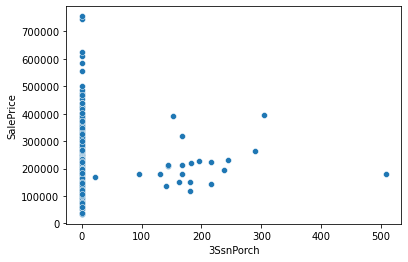

In [294]:
sn.scatterplot(x=df['3SsnPorch'],y=df['SalePrice'])
plt.show()

From the few records we have, we observe that the prices of houses increases as the 3 season porch area in the house is increasing.

In [295]:
list_cols[70]

'ScreenPorch'

##### 71.'ScreenPorch'

Screen porch area in square feet

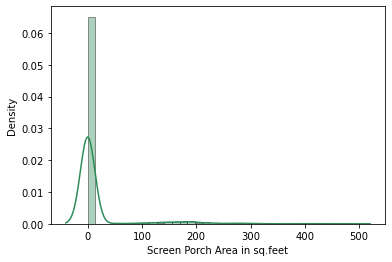

In [296]:
sn.distplot(df['ScreenPorch'],color = 'seagreen',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Screen Porch Area in sq.feet')
plt.show()

From above plot, we see that almost all houses in our housing dataset had less than 50 sq.feet of Screen Porch Area.

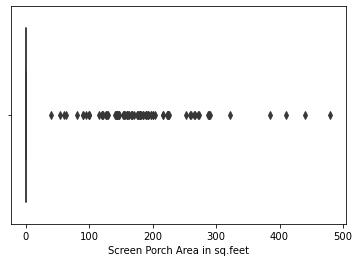

In [297]:
sn.boxplot(df['ScreenPorch'],color = 'seagreen')
plt.xlabel('Screen Porch Area in sq.feet')
plt.show()

In [298]:
len(df['ScreenPorch'][df['ScreenPorch']==0])/len(df['ScreenPorch'])*100

91.86643835616438

We observe that as almost all records in our housing dataset had no screen porch area, we see that all the records with screen porch area have been shown as outliers.

In [299]:
list_cols[71]

'PoolArea'

##### 72.'PoolArea'

Pool area in square feet

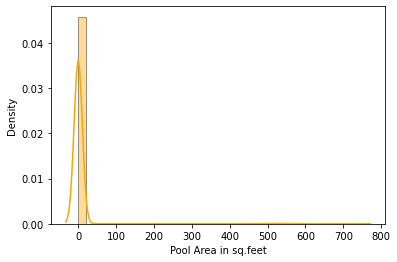

In [300]:
sn.distplot(df['PoolArea'],color = 'orange',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Pool Area in sq.feet')
plt.show()

From above plot, we see that we do not have any records for houses with pool area more than 50 sq.feet.

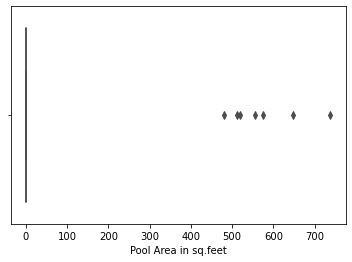

In [301]:
sn.boxplot(df['PoolArea'],color = 'orange')
plt.xlabel('Pool Area in sq.feet')
plt.show()

As most of our records have 0 pool area in sq.feet, we see that few house records with pool area available are shown as outliers in above plot.

#### PoolArea vs SalePrice

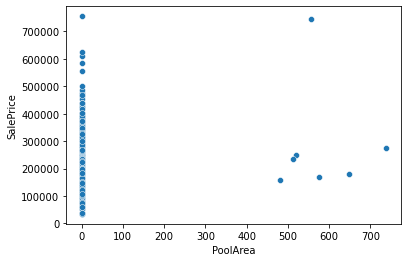

In [302]:
sn.scatterplot(x=df['PoolArea'],y=df['SalePrice'])
plt.show()

We observe that as the pool area of house increases, the price of the house is also increasing.

In [303]:
list_cols[72]

'PoolQC'

##### 73.'PoolQC'

Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

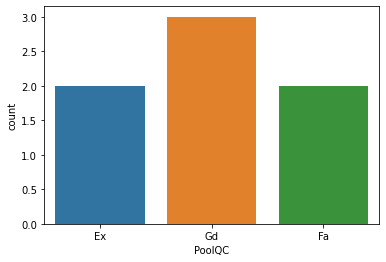

In [304]:
sn.countplot(df['PoolQC'])
plt.show()

Our housing dataset has very few records for houses with pool, and out of all those houses, we have 3 houses which have their pool in 'Good' condition, while 2-2 houses have their pools in 'Excellent' and 'Fair' conditions.

#### PoolQC vs SalePrice

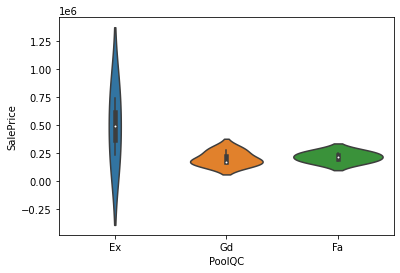

In [305]:
sn.violinplot(x=df['PoolQC'],y=df['SalePrice'])
plt.show()

We observe that houses with excellent pool quality have a large range of sale prices

In [306]:
list_cols[73]

'Fence'

##### 74.'Fence'

Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	    Good Wood
       MnWw	    Minimum Wood/Wire
       NA	    No Fence

In [307]:
df['Fence']

0         NaN
1         NaN
2         NaN
3       MnPrv
4         NaN
        ...  
1163    MnPrv
1164    MnPrv
1165      NaN
1166    MnPrv
1167      NaN
Name: Fence, Length: 1168, dtype: object

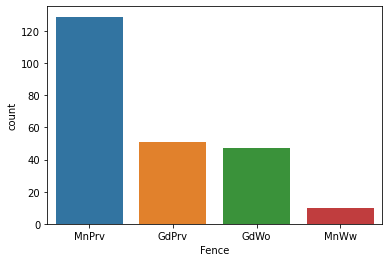

In [308]:
sn.countplot(df['Fence'])
plt.show()

In our housing dataset, we have around 130 houses with 'Minimum Privacy', around 40-50 houses with 'Good Privacy' and 'Good Wood' each. We have very few records avaialble for houses with 'minimum wood/wire' fencing

#### Fence vs SalePrice

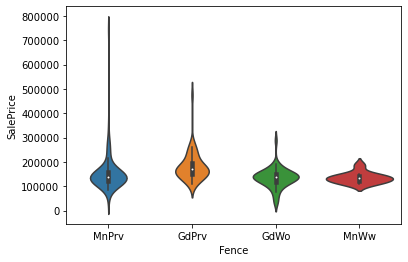

In [309]:
sn.violinplot(x=df['Fence'],y=df['SalePrice'])
plt.show()

Houses with minimum privacy have surprisingly high sale price as compared to houses with good privacy

In [310]:
list_cols[74]

'MiscFeature'

##### 75.'MiscFeature'

Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

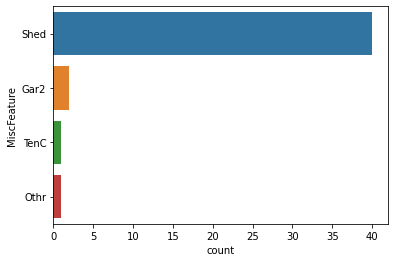

In [311]:
sn.countplot(y=df['MiscFeature'])
plt.show()

From above plot, we see that in our housing dataset vary few houses had miscellaneous features like 40 houses have 'Shed(OVer 100 SF)', very few houses had '2nd Garage', and some had 'Tennis Court'.

#### MiscFeature vs SalePrice

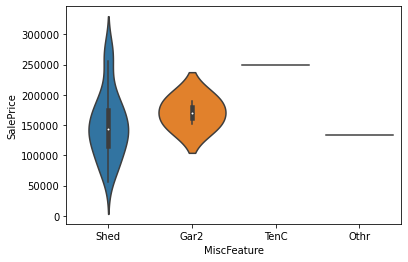

In [312]:
sn.violinplot(x=df['MiscFeature'],y=df['SalePrice'])
plt.show()

We observe that under miscellaneous features, houses with shed of over 100 sq.feet surface area have fetched more varying sell prices followed by houses with 2 garages, we have records with houses with tennis courts fetching high prices.

In [313]:
list_cols[75]

'MiscVal'

##### 76.'MiscVal'

$Value of miscellaneous feature

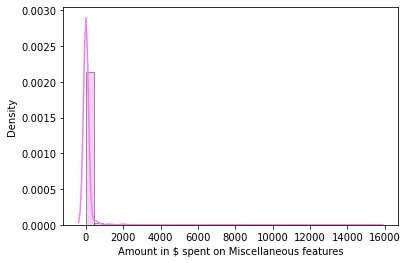

In [314]:
sn.distplot(df['MiscVal'],color = 'violet',hist_kws=dict([('edgecolor','k')]))
plt.xlabel('Amount in $ spent on Miscellaneous features')
plt.show()

We see that , we have housing records for houses where the amount spent on the miscalleneous things is less than $2000.

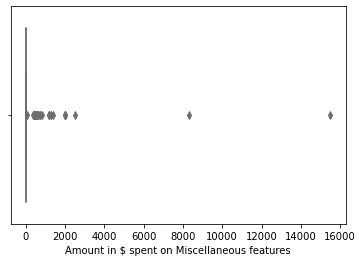

In [315]:
sn.boxplot(df['MiscVal'],color = 'violet')
plt.xlabel('Amount in $ spent on Miscellaneous features')
plt.show()

We observe that we have very few record with high spending on miscellaneous feature of the house, so these particular data points are shown as outliers in above plot.

#### MiscVal vs SalePrice

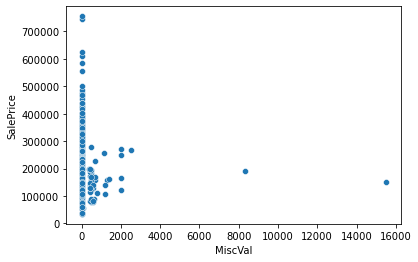

In [316]:
sn.scatterplot(x=df['MiscVal'],y=df['SalePrice'])
plt.show()

We do not see increase in sale price with increase in amount spent on miscellaneous features of the house.

In [317]:
list_cols[76]

'MoSold'

##### 77.'MoSold'

Month Sold (MM)

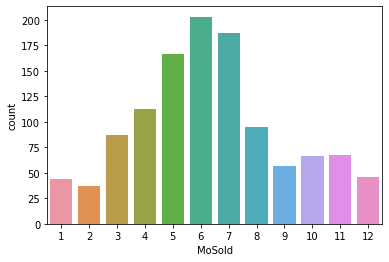

In [318]:
sn.countplot(df['MoSold'])
plt.show()

From above plot, we have dataset wherein most of the house sale has happened in the month of 'June', followed by in the months of 'May' and 'July'. 

#### MoSold vs SalePrice

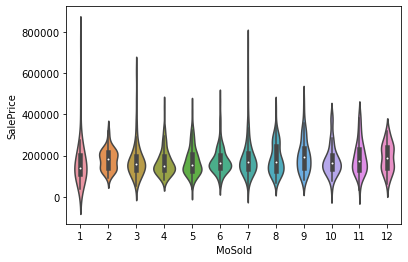

In [319]:
sn.violinplot(x=df['MoSold'],y=df['SalePrice'])
plt.show()

We observe that house sales in month of January, June and March have crossed the USD 600,000 price range.

In [320]:
list_cols[77]

'YrSold'

##### 78.'YrSold'

Year Sold (YYYY)

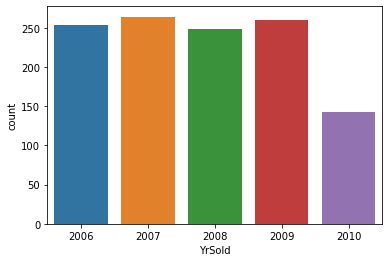

In [321]:
sn.countplot(df['YrSold'])
plt.show()

We have almost equal number of records for each year 2006-2009 and around 150 records from 2010.

#### YrSold vs SalePrice

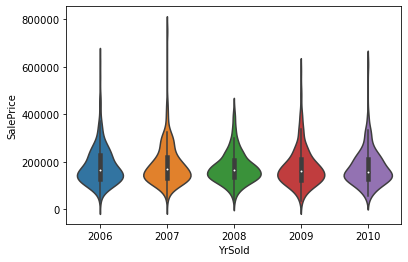

In [322]:
sn.violinplot(x=df['YrSold'],y=df['SalePrice'])
plt.show()

We observe that the house sale prices have been peaked in 2007, dropped in 2008 and we observe gradual increase in sale prices after 2009.

In [323]:
list_cols[78]

'SaleType'

##### 79.'SaleType'

Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

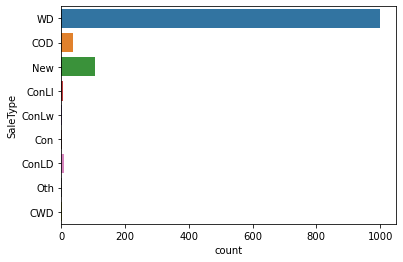

In [324]:
sn.countplot(y=df['SaleType'])
plt.show()

Our housing dataset have around 1000 records of sale with 'Conventional - warranty deed', while less than 50 records of house sales with 'Court Officer Deed'. We also have 100 records available for houses which are newly built and sold.

#### SaleType vs SalePrice

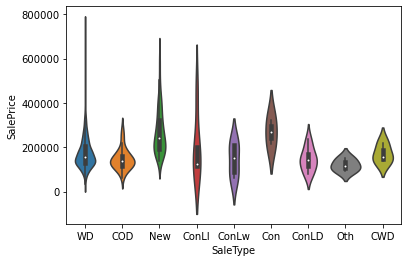

In [325]:
sn.violinplot(x=df['SaleType'],y=df['SalePrice'])
plt.show()

We observe that houses sold through conventional warranty deed and newly built and constructed houses have fetched high sale prices followed by houses sold on low interest Contract.

In [326]:
list_cols[79]

'SaleCondition'

##### 80.'SaleCondition'

Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

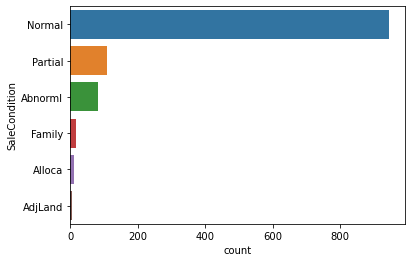

In [327]:
sn.countplot(y=df['SaleCondition'])
plt.show()

We have around 900 records of 'Normal' house sale while around 100 records of house sale in which case the construction was not complete. We also have around 50 records of 'abnormal' house sales like trade, foreclosure, shortsell. We also have very few records of in-family house transfer.

#### SaleCondition vs SalePrice

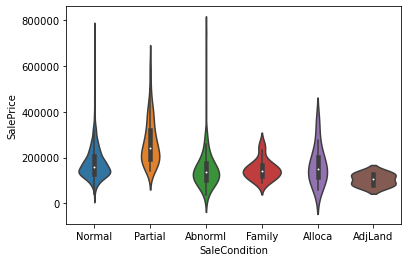

In [328]:
sn.violinplot(x=df['SaleCondition'],y=df['SalePrice'])
plt.show()

We observe that normal house sale has more prices and few records of abnormal deal closures have recorded high prices. We also have few records with partial completion of construction.

### EDA Analysis Summary

Wwe observe most of the house sale has happened between price range USD100,000 - USD400,000. We have few house sale deals of around USD800,000. The 'Id' feature is not of significance for our business problem as it is just an identification number assigned to the records in our dataset. 

In our dataset, in general, 1-story and 2-story built houses have recorded high selling prices followed by Planned Unit Development 1-story houses. For other dwelling types, the house price has been around USD 300,000.

 From our housing dataset it is clear that houses in Residential Zones with Lower and Medium density have gone for higher prices as compared to houses in the Floating Village Residential zone and Residential Zone with High density.

 As the linear length from the house to the street is increasing , the house sale price is also increasing but only up to 100 sq.feet beyond which the prices are coming down. The same trend is seen for the data available for 'LotArea' feature, in which the house prices are increasing as the lot area of the house increases but only upto 20,000 sq.feet after that the prices are lowered for more lot area.

In our housing dataset we have only 4 sale records for houses with 'Gravel' road access to the property. So we will exclude the 'Street' feature for model building. However, we observe in our housing dataset that the prices for houses with Gravel road access to the property have not gone for more than USD 400,000 which has been the case for Paved road access houses.

Out of 1168 available records, we have 41 records of house with 'Gravel' type alley access to the property which is just 3.5% of the total records and 36 house records with 'Paved' type alley access which is just 3% of the total records. So we will exclude 'Alley' feature as the data is unequal for available categories to predict. However, we observe that houses with any one out of 'Gravel' or 'Paved' alley access have not gone beyond USD 300,000 as per our records.

We have 63% of house sale records with regular lot shape while 33% of the dataset records have slight irregularity in it's shape. We also have few records of houses with moderately or completely irregular lot shape but it might not concern our final prediction model as most of the houses on sale in demand will be of regular lot shape only. We also observe few high prices for slightly irregular lot shaped house which might be an unnatural condition sale , otherwise the median prices for houses with all shapes of lot area is around USD 200,000. But as the data is not balanced for all available categories, we will exclude this feature.

We observe that 90% of the house sale records are for houses built on flat level grounds, while less than 5% data is available for houses built on banked level, or hillside houses with significant slope on both sides and depressed level built houses. So the data in this feature is not balanced for all categories, so we will remove this feature for building a predictive model.

We observe that 'Utilities' feature has data available for houses which are in the vicinity of all public utilities. We do not have records for houses which are lacking some kind of utilities like sewer or electricity. As this feature's data is not balanced for all available categories , we will exclude this feature for  predicting house prices.

We have 72% of the records available for houses which are surrounded by other houses while 19% of the records are for houses around corner and less than 6% data is available for houses with frontage on 2 sides of property. As the data is not balanced within categories, we will exclude this feature for building predictive model.

We have more than 90% sale records available for houses built on 'Gentle' slope while very less records are available for houses built on moderate and severe slope. So this feature will not provide balanced weight of each category for model building, so we will exclude this feature.

In our dataset, we have maximum records for the houses in the 'North Ames' neighbourhood, followed by 'College Creek', 'Old Town', and 'Edwards' neighbourhoods. We have sufficient records from various multiple locations.

We have very few records available for houses which are very near to North-South or East-West Railroads, near to arterial street and feeder street. Most of the houses in our dataset are within normal proximity to all railroads or parks. So as this feature is not balanced number of records for all available categories, we will exclude this feature. However, we observe that the sale prices for houses within normal proximity to railroads and parks have fetched high sale price.

We also see that our dataset contains more than 90% of the 1-family type building data and very few records are available for duplex or 2-family (converted from 1-family house) or townhouse units. So we will exclude this feature for predictive model building.

From our housing dataset, we observe that 49% of the records are of 1-story houses, 30% dataset contains 2-story house data while One & One-half story and Two & One-half story and split level house records are less than 10%.  We observe maximum value range for 2-story and 2.5-story houses while as expected less prices are recorded for unfinished houses.

Our dataset has maximum records present for average-above average-good quality houses which are in above average or good living conditions. We observe that houses with excellent and good quality have fetched high sales prices while houses with average or good living conditions have fetched more price as par with the houses with excellent living conditions. So we will exclude 'OverallCond' feature while we will keep the 'OverallQual' feature.

We also observe that newly built houses have fetched higher prices as well as newly remodelled houses. In our dataset, 'YearRemodAdd' has data of year of remodelling of the house, if not remodelled the data is same as construction year, so we will keep 'YearRemodAdd' feature and remove 'YearBuilt' feature for model building.

We have more than 85% of house sale records for houses with roof style 'Gable', and 1/5th records are for houses with Hip roof. As we do not sufficient records for all various roof types, we will exclude this feature for model building. We also remove 'RoofMatl' feature as all of our house have 'standard composite shingle' material.

We have house records with 1st exterior made up of materials such as Vinyl Siding (33% records), Wood Siding (15% records), Metal Siding (15% records) and Hard Board exteriors (15% records), also few house records with other materials such as Cement Board, Stucco  , Brick Face, Wood Shingles, Asbestos Shingles are available to us. We observe that 'Exterior2nd' feature has same no. Of records and same relation with target feature 'SalePrice' as 'Exterior1st' feature, so we will exclude 'Exterior2nd' feature.

In our housing dataset, we have 59% of the houses without any masonry veneer but we have 30% house records with Brick Face masonry veneer and 8% houses with Stone masonry veneer. We observe that Brick Face and Stone type masonry veneer houses have high sale prices. But we observe in our dataset that 59% of the houses do not have any masonry veneer allocated area, so we will exclude 'MasVnrArea' feature.

We have only less than 5% of houses with excellent quality of material used for exterior while 61% records have 'Typical' quality exterior material and 33% of houses have 'Good' quality material for exterior. And as expected , we observe that excellent and good quality exterior houses have high sales prices. We also observe in our dataset that more than 90% of records have houses with exterior in typical/average condition and we have less than 10% data altogether for houses with exterior in excellent,good,poor condition. So we will exclude this feature.

In our dataset, we have houses with Cinder Block foundation, Poured Concrete foundation, Brick & Tile foundation, slab, stone foundations.  We observe high prices for houses with Poured concrete foundation followed by houses with Cinder Block or Brick & Tile foundation.

In our housing dataset most of the houses have 'Good'  height basements of 90-99 inches and 'Average/Typical' height basements of 80-89 inches. We have less than 100 records for houses with basements more than 100+ inches height and less than 80 inches height. We also observe that houses with 100+ inches height basements have sold for high prices. We have 89% records of houses which have basement in 'Typical' condition and very few records for houses where basement is in 'Excellent' or 'Good' or 'Fair' or 'Poor' condition, so we will exclude 'BsmtCond' from model building. We also have uneven number of records for the feature 'BsmtExposure' such that we have 64% house records with no any kind of basement exposure. So we will exclude this feature too.

In our housing dataset, we have 28% houses which have Good living quality basement while 14% houses have 'Average' living quality basement. 29% of the houses have unfinished basements while around 100 houses have each Below  living  quality houses and Average Rec Room in basement. And we also observe that houses with Good living quality basements have sold for higher prices while all other basement utilized houses have sold for almost same price range. We observe that Type1 basement finishing area for most of the houses is zero, so we will exclude the 'BsmtFinSF1' feature. We will also exclude 'BsmtFinType2' feature as the data is unbalanced with 90% of the houses having unfinished 2nd basement and for the same reason we will exclude 'BsmtFinSF2' feature which gives data about surface area of 2nd basement.

We have house records with basement more than 2000 sq.feet. We observe high correlation between the total basement area and sale price of the house . We observe in our dataset, we have house records with unfinished basement upto 2500 sq.feet. We see that there is no high correlation between unfinished basement area and sale price of the house, so we will exclude this feature. 

In our housing dataset, we do not have uneven data for categories in 'Heating' feature with more than 90%  of house records have 'Gas forced warm air furnace' for heating. So we will exclude this feature and feature assessing heating quality of the house i.e. 'HeatingQC'. We also observe that more than 90% if the houses have central air conditioning , so the data is unbalanced for predicting any results. So we will exclude 'CentralAir' feature. In our housing dataset, more than 90% of houses have 'Standard circuit Breakers & Romex' for electrical system , so we won't be able to predict correct results for other electrical system houses, so we will exclude 'Electrical' feature.

In our housing dataset, most of the houses have 1st floor surface area of 1000-2000 sq.feet.  We observe high correlation between 1st floor surface area and sale price of the house. We have very few houses with 2nd floor surface area so we will exclude '2ndFlrSF' feature. We observe in our dataset we have very few records of houses with some sq.feet of low quality finishing so we will drop the feature 'LowQualFinSF'.

Most of the houses in our dataset has 1000-2000 sq.feet of above ground living area. We also observe high correlation between this 'GrLivArea' feature and our target feature 'SalePrice'. In our dataset most of the houses did not have bathrooms in basement so we will exclude this feature as we have few records for houses with 1 or more basement bathrooms. Similarly we will exclude 'BsmtHalfBath' feature as we do not have many records for houses with half bathrooms in basement.

On the other hand, we have sufficient records for houses with 1 or more full bathrooms above ground and we also observe that as the number of full bathrooms increases in a house, the house are selling for high prices. But we have less than 50% records for houses with 1 or more half bathrooms above ground , so we will drop the 'HalfBath' feature.

In our dataset, we have more than 50% house records for houses with 3 bedrooms, while around 280 records are available for houses with 2 bedrooms and around 100 records for houses with 4 or more bedrooms. We also observe that the prices are increasing as number of bedrooms are increasing but we see a drop in prices for houses with 3 bedrooms which are more than 50% of the records. So we will drop the 'BedroomAbvGr' feature.

In our housing dataset, we have very few records for houses with more than 1 kitchen as around 95% of the records are for houses with 1 kitchen . So we will exclude this feature as the distribution amongst categories of this feature is uneven. Also , as we do not have sufficient data for kitchens in the houses, we will exclude the feature with quality of kitchens 'KitchenQual'

We observe in our dataset that as the total number of rooms above ground in a house are increasing , the sale price of the house is also increasing. We do not have sufficient data for other than 'Typical' category for functioning of the house feature - 'Functional', so we will exclude this feature. We have very few records for houses with fireplaces more than 1 to establish high correlation with target feature, so we will drop 'Fireplaces' feature and the 'FireplaceQu' feature describing the quality of fireplace in the house.

We have around 700 houses with attached garages which have high prices, around 100 records for houses with Built-in garages which have gone highest after attached garages . We also have more than 300 records for houses with detached garages. We do not see high correlation between Garage Built Year and target feature 'SalePrice', so we will drop the feature 'GarageYrBlt'. We observe that houses with finished or roughly finished garages have high prices than unfinished garages. We observe that as the garage capacity for number of cars increase, the house prices are increasing. We also observe that we have most of the records for houses with garage area of 20-25 sq.feet and we see that their is high correlation between house sale prices and the garage area. We have more than 95% of garages in 'Typical' condition, so we will exclude the 'GarageQual' feature, we also have uneven data for 'GarageCond' feature, so will drop it too. 

In our housing dataset, we observe that the house sale prices are increasing as the wood deck area increases, but we have 51% of houses with zero sq.feet of wood deck area. So we will exclude 'WoodDeckSF' feature. We also have 49% of houses with zero sq.feet of Open Porch area , so we will exclude this feature also. We have 85% of house records with zero sq.feet of Enclosed Porch area, so we will exclude 'EnclosedPorch' feature. We have 98% of house records with zero sq.feet of 3 season porch, so we will exclude this feature. We have 91% records of houses with zero sq.feet of screen porch, so we will exclude 'ScreenPorch' feature. Most of our house records do not have pool area allocated, so we will exclude 'PoolArea' and 'PoolQC'.

In our housing dataset, we have houses with various fencing types such as 'Good Privacy', 'Minimum Privacy', 'Good Wood', 'Minimum Wood/Wire'. But we will exclude this feature as we have large null values in this feature. We will exclude 'MiscFeature' feature few records are available and also the feature which provides data about money spent on these few miscellaneous house for them.

We will exclude features like Month or Year of house sold. We will exclude the feature about sale type and sale condition as we do not have enough records for each category for both features.


### Data Pre-processing

Before moving ahead we will create a copy of the dataset to keep original dataset intact. 

In [329]:
df_cp1 = pd.DataFrame(data=df)

In [330]:
df.shape

(1168, 81)

In [331]:
df_cp1.shape

(1168, 81)

##### Feature extraction based on EDA

We will exclude some features based on our Exploratory Data Analysis for various reasons like uneven data for all categories or not correlated with target feature

In [332]:
remove_cols = ['PavedDrive','Id','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','OverallCond','YearBuilt','RoofStyle','RoofMatl','Exterior2nd','MasVnrArea','ExterCond','BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','HeatingQC','CentralAir','Electrical','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Functional','Fireplaces','FireplaceQu','GarageYrBlt','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','SaleType','MoSold','YrSold','SaleCondition']

In [333]:
for i in remove_cols:
    df_cp1.drop(i,axis=1,inplace=True)

In [334]:
df_cp1.shape

(1168, 24)

After removing features based on our exploratory data analysis of the dataset , we have left with 25 features. After filling missing values and outlier treatment, we will once again try to reduce the features.

In [335]:
#pd.set_option('max_rows',None)

##### Missing value treatment

In [336]:
for i in df_cp1.columns:
    if df_cp1[i].isnull().sum()!=0:
        print(str(i)+"\t"+'\t'+df_cp1[i].isnull().sum().astype(str))

LotFrontage		214
MasVnrType		7
BsmtQual		30
BsmtFinType1		30
GarageType		64
GarageFinish		64


In [337]:
null_features = []
null_features.clear()
for i in df_cp1.columns:
    if df_cp1[i].isnull().sum()!=0:
        null_features.append(i)

In [338]:
for i in null_features:
    if df_cp1[i].dtype == 'float64':
        df_cp1[i].fillna(df_cp1[i].mean(),inplace=True)
    elif df_cp1[i].dtype == 'O':
        df_cp1[i].fillna(df_cp1[i].mode()[0],inplace=True)
    elif df_cp1[i].dtype == 'int64':
        df_cp1[i].fillna(df_cp1[i].mean(),inplace=True)

In [339]:
flag = 0
for i in df_cp1.columns:
    if df_cp1[i].isnull().sum()!=0:
        print(str(i)+"\t"+'\t'+df_cp1[i].isnull().sum().astype(str))
        flag = 1
if flag != 1:
    print('We have removed missing values from our selected features')

We have removed missing values from our selected features


##### Skewness and outlier treatment

As discussed in EDA, we will apply log transform on 'LotFrontage','LotArea','1stFlrSF','GrLivArea' and square root transforms on 'TotalBsmtSF','GarageArea'.

In [340]:
df_cp1['LotFrontage'].min()

21.0

In [341]:
df_cp1['LotFrontage'] = np.log(df_cp1['LotFrontage'])

In [342]:
df_cp1['LotArea'].min()

1300

In [343]:
df_cp1['LotArea'] = np.log(df_cp1['LotArea'])

In [344]:
df_cp1['1stFlrSF'].min()

334

In [345]:
df_cp1['1stFlrSF'] = np.log(df_cp1['1stFlrSF'])

In [346]:
df_cp1['GrLivArea'].min()

334

In [347]:
df_cp1['GrLivArea'] = np.log(df_cp1['GrLivArea'])

In [348]:
df_cp1['TotalBsmtSF'].min()

0

In [349]:
df_cp1['TotalBsmtSF'] = np.sqrt(df_cp1['TotalBsmtSF'])

In [350]:
df_cp1['GarageArea'].min()

0

In [351]:
df_cp1['GarageArea'] = np.sqrt(df_cp1['GarageArea'])

In [352]:
numerical_cols = ['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']

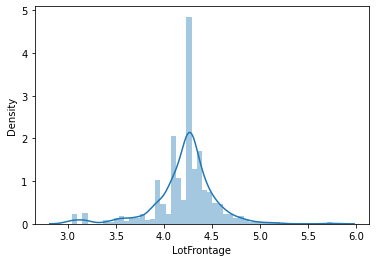

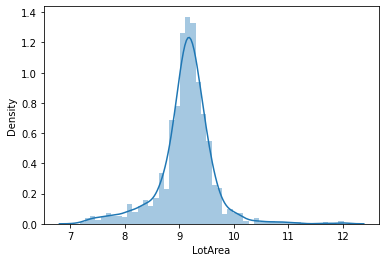

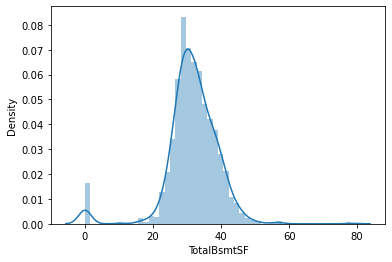

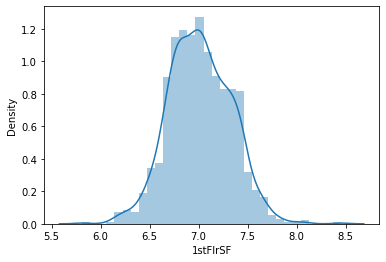

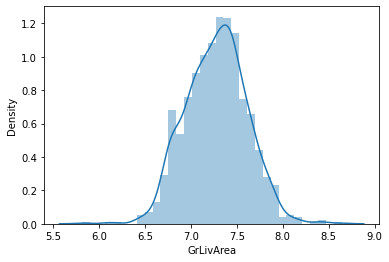

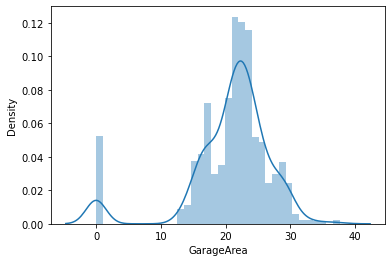

In [353]:
for i in numerical_cols:
    sn.distplot(df_cp1[i])
    plt.show()

We will exclude 'GarageArea' feature as we are not able to make the data distribution in bell shaped normal curve, so we do not want to use it in model building.

In [ ]:
df_cp1.drop('GarageArea',axis=1,inplace=True)

In [355]:
df_cp1.shape

(1168, 23)

In [363]:
numerical_cols.remove('GarageArea')

We have rduced skewnes to certain extent from the numerical features. We have data in our numerical features in the form of bell shaped curve , we will standardize it.

#### Label Encoding

In [359]:
categorical_cols = []
for i in df_cp1.columns:
    if i in numerical_cols or i=='SalePrice':
        continue
    else:
        categorical_cols.append(i)

In [360]:
len(categorical_cols)

17

In [364]:
len(numerical_cols)

5

In [367]:
from sklearn.preprocessing import LabelEncoder

In [368]:
le = LabelEncoder()

In [369]:
for i in categorical_cols:
    df_cp1[i] = le.fit_transform(df_cp1[i].astype(str))

In [373]:
df_cp1['GarageFinish'].value_counts()

2    551
1    339
0    278
Name: GarageFinish, dtype: int64

### Model Building

In [377]:
x = df_cp1.drop('SalePrice',axis=1)
y = df_cp1['SalePrice']

#### Standardization

In [374]:
from sklearn.preprocessing import StandardScaler

In [376]:
s = StandardScaler()

In [378]:
x = s.fit_transform(x)

#### Principal component analysis to reduce features

In [356]:
from sklearn.decomposition import PCA

In [357]:
pca = PCA(n_components=10)

In [379]:
x.shape

(1168, 22)

In [380]:
x = pca.fit_transform(x)

In [381]:
x.shape

(1168, 10)

#### splitting train and test data

In [389]:
from sklearn.model_selection import train_test_split

In [390]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=58)

#### Linear regressor

In [391]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr=LinearRegression()
lr.fit(x_train,y_train)

lr.score(x_train,y_train)

0.7280420878316853

Our model is learning with 72% accuracy

In [392]:
lr.coef_

array([ 28048.85233496,   4494.69078123,  -2015.0182486 ,   4419.41362171,
         4976.35818221, -14806.04348432,   4956.01307732,  -1419.90597107,
           67.41701117,  -2923.98720208])

In [393]:
lr.intercept_

182325.1438623685

In [394]:
pred_lr = lr.predict(x_test)

In [395]:
print("Errors:\n")
print("Mean Squared Error: \t",mean_squared_error(y_test,pred_lr))
print("\nMean Absolute Error: \t",mean_absolute_error(y_test,pred_lr))
print("\nRoot Mean Squared Error: \t",np.sqrt(mean_squared_error(y_test,pred_lr)))

Errors:

Mean Squared Error: 	 960748594.0134172

Mean Absolute Error: 	 22806.3290630537

Root Mean Squared Error: 	 30995.94479949623


In [396]:
print("The R2 score is ",r2_score(y_test,pred_lr))

The R2 score is  0.8108660599231736


#### checking cross validation score for linear regressor

In [397]:
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(lr, x_train, y_train, cv=10)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(score_cv))


 The absolute mean score we got from 10-Fold CV: 0.7212187452930505


#### checking performance of other algorithms

##### Decision tree regressor

In [398]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()

dtr_cv=cross_val_score(dtr,x_train,y_train,cv=10)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(dtr_cv))


 The absolute mean score we got from 10-Fold CV: 0.5756319455201562


##### Random Forest Regressor

In [399]:
from sklearn.ensemble import RandomForestRegressor

rfr_cross_val=[]
rfr_n_estimators=[]

for i in range(10,50):
    rfr=RandomForestRegressor(n_estimators=i)
    rfr_n_estimators.append(i)
    rfr_cross_val.append(cross_val_score(rfr,x_train,y_train,cv=10).mean())
    
rf_cv=pd.DataFrame({})
rf_cv["RF CV Score"]=rfr_cross_val
rf_cv['n estimator']=rfr_n_estimators

rf_cv.max()

RF CV Score     0.761979
n estimator    49.000000
dtype: float64

#### Comparing the cross validation scores

In [400]:
results1=[]
results1.append(score_cv)
results1.append(dtr_cv)
results1.append(rf_cv['RF CV Score'])

names1=[]
names1.append("Linear Regression")
names1.append("Decision Tree Regressor")
names1.append("Random Forest Regressor")

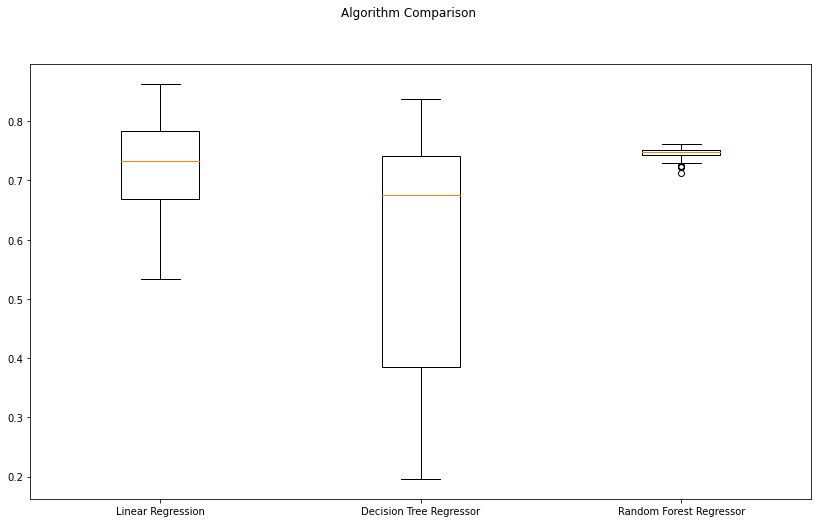

In [401]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

#### We will use Linear Regression algorithm for our requirement.

### import test dataset

In [403]:
test_df = pd.read_csv('C:/Users/ashis/Downloads/Project-Housing--2-/Project-Housing_splitted/test.csv',index_col = False)

In [404]:
test_df.shape

(292, 80)

#### drop features not used during model building

In [405]:
for i in remove_cols:
    test_df.drop(i,axis=1,inplace=True)

In [406]:
test_df.shape

(292, 23)

##### missing value treatment

In [407]:
for i in test_df.columns:
    if test_df[i].isnull().sum()!=0:
        print(str(i)+"\t"+'\t'+test_df[i].isnull().sum().astype(str))

LotFrontage		45
MasVnrType		1
BsmtQual		7
BsmtFinType1		7
GarageType		17
GarageFinish		17


In [408]:
null_features = []
null_features.clear()
for i in test_df.columns:
    if test_df[i].isnull().sum()!=0:
        null_features.append(i)

In [409]:
for i in null_features:
    if test_df[i].dtype == 'float64':
        test_df[i].fillna(test_df[i].mean(),inplace=True)
    elif test_df[i].dtype == 'O':
        test_df[i].fillna(test_df[i].mode()[0],inplace=True)
    elif test_df[i].dtype == 'int64':
        test_df[i].fillna(test_df[i].mean(),inplace=True)

In [410]:
flag = 0
for i in test_df.columns:
    if test_df[i].isnull().sum()!=0:
        print(str(i)+"\t"+'\t'+test_df[i].isnull().sum().astype(str))
        flag = 1
if flag != 1:
    print('We have removed missing values from test dataset')

We have removed missing values from test dataset


#### Skewness and outliers in numerical features

In [415]:
numerical_cols = ['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea']

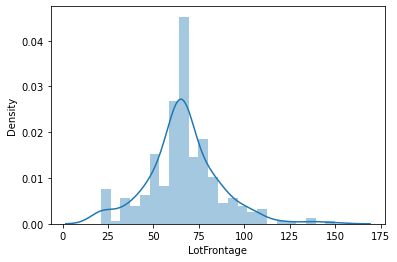

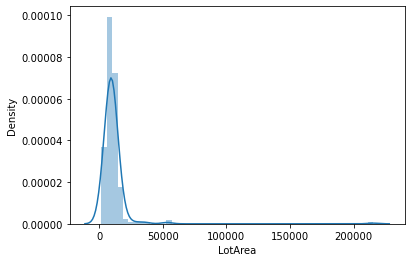

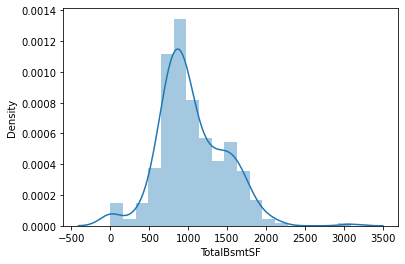

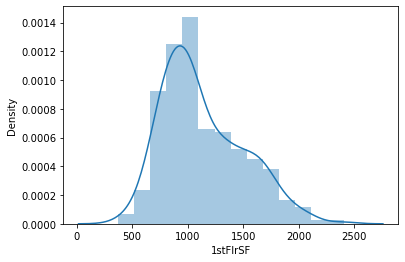

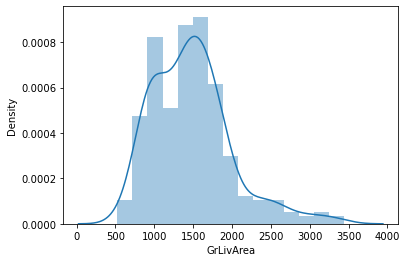

In [416]:
for i in numerical_cols:
    sn.distplot(test_df[i])
    plt.show()

We will try to reduce skewness present in 'LotArea' feature.

In [414]:
test_df['LotArea'].min()

1526

In [417]:
test_df['LotArea'] = np.log(test_df['LotArea'])

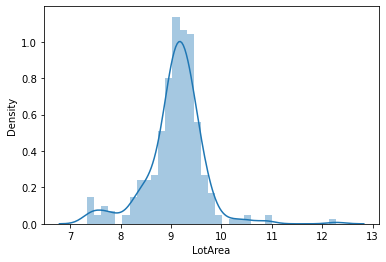

In [418]:
sn.distplot(test_df['LotArea'])
plt.show()

We have removed skewness from the 'LotArea' feature with the help of log transform.

#### Label Encoding

In [419]:
categorical_cols = []
categorical_cols.clear()

for i in test_df.columns:
    if i in numerical_cols or i=='SalePrice':
        continue
    else:
        categorical_cols.append(i)

In [420]:
for i in categorical_cols:
    test_df[i] = le.fit_transform(test_df[i].astype(str))

#### Standardization

In [421]:
test_df = s.fit_transform(test_df)

#### Principal component analysis

In [422]:
test_df.shape

(292, 23)

In [429]:
test_df = pca.fit_transform(test_df)

In [430]:
test_df.shape

(292, 10)

In [431]:
test_predictions = lr.predict(test_df)

In [432]:
test_predictions

array([3.49190339e+05, 1.96192430e+05, 2.43539117e+05, 1.42975166e+05,
       3.06408031e+05, 2.45293245e+04, 1.28121743e+05, 3.37324494e+05,
       2.72343703e+05, 1.50546272e+05, 3.51314880e+04, 1.36091811e+05,
       1.78748770e+05, 2.09447315e+05, 3.10890880e+05, 8.96588309e+04,
       1.09941493e+05, 1.43368767e+05, 1.65101065e+05, 1.96170872e+05,
       1.51067952e+05, 1.62087897e+05, 1.34813620e+05, 1.17143739e+05,
       1.01289667e+05, 1.02817797e+05, 2.08399780e+05, 1.40557832e+05,
       1.92221144e+05, 7.65897040e+04, 1.94503850e+05, 2.39866775e+05,
       2.51209492e+05, 1.57751676e+05, 1.28618165e+05, 2.15480500e+05,
       2.14688210e+05, 3.91801902e+03, 1.69872422e+05, 1.11294021e+05,
       7.72530197e+04, 2.85498998e+05, 2.35812919e+05, 2.45751332e+05,
       1.94829042e+05, 8.57502807e+04, 1.19488187e+05, 1.12071917e+05,
       2.20637771e+05, 3.37910347e+05, 1.57115585e+05, 2.07370494e+05,
       4.89156345e+04, 9.00938978e+04, 2.67956341e+05, 1.68082243e+05,
      